In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

# EDA

In [2]:
df = pd.read_csv('/content/ML Session 02 FuelConsumptionCo2.csv')
# Drop the MPG column
df.drop(['FUELCONSUMPTION_COMB_MPG'], axis=1, inplace=True)
# Create a new columnn that shows MAKE and MODEL together and place it just
# after MODEL
df['MAKEMODEL'] = df['MAKE'] + ' ' + df['MODEL']
make_model = df['MAKEMODEL']
df.drop(labels=['MAKEMODEL'], axis=1,inplace = True)
df.insert(3, 'MAKEMODEL', make_model)
df.head()

MODELYEAR   MAKE       MODEL         MAKEMODEL VEHICLECLASS  ENGINESIZE  \
0       2014  ACURA         ILX         ACURA ILX      COMPACT         2.0   
1       2014  ACURA         ILX         ACURA ILX      COMPACT         2.4   
2       2014  ACURA  ILX HYBRID  ACURA ILX HYBRID      COMPACT         1.5   
3       2014  ACURA     MDX 4WD     ACURA MDX 4WD  SUV - SMALL         3.5   
4       2014  ACURA     RDX AWD     ACURA RDX AWD  SUV - SMALL         3.5   

   CYLINDERS TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          4          AS5        Z                   9.9                  6.7   
1          4           M6        Z                  11.2                  7.7   
2          4          AV7        Z                   6.0                  5.8   
3          6          AS6        Z                  12.7                  9.1   
4          6          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  CO2EMISSIONS  
0                   8.5           196  
1                   9.6           221  
2                   5.9           136  
3                  11.1           255  
4                  10.6           244

In [3]:
df.describe(include='all')

MODELYEAR  MAKE     MODEL      MAKEMODEL VEHICLECLASS   ENGINESIZE  \
count      1067.0  1067      1067           1067         1067  1067.000000   
unique        NaN    39       663            663           16          NaN   
top           NaN  FORD  F150 FFV  FORD F150 FFV     MID-SIZE          NaN   
freq          NaN    90         8              8          178          NaN   
mean       2014.0   NaN       NaN            NaN          NaN     3.346298   
std           0.0   NaN       NaN            NaN          NaN     1.415895   
min        2014.0   NaN       NaN            NaN          NaN     1.000000   
25%        2014.0   NaN       NaN            NaN          NaN     2.000000   
50%        2014.0   NaN       NaN            NaN          NaN     3.400000   
75%        2014.0   NaN       NaN            NaN          NaN     4.300000   
max        2014.0   NaN       NaN            NaN          NaN     8.400000   

          CYLINDERS TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  \
count   1067.000000         1067     1067           1067.000000   
unique          NaN           22        4                   NaN   
top             NaN           A6        X                   NaN   
freq            NaN          222      514                   NaN   
mean       5.794752          NaN      NaN             13.296532   
std        1.797447          NaN      NaN              4.101253   
min        3.000000          NaN      NaN              4.600000   
25%        4.000000          NaN      NaN             10.250000   
50%        6.000000          NaN      NaN             12.600000   
75%        8.000000          NaN      NaN             15.550000   
max       12.000000          NaN      NaN             30.200000   

        FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  CO2EMISSIONS  
count           1067.000000           1067.000000   1067.000000  
unique                  NaN                   NaN           NaN  
top                     NaN                   NaN           NaN  
freq                    NaN                   NaN           NaN  
mean               9.474602             11.580881    256.228679  
std                2.794510              3.485595     63.372304  
min                4.900000              4.700000    108.000000  
25%                7.500000              9.000000    207.000000  
50%                8.800000             10.900000    251.000000  
75%               10.850000             13.350000    294.000000  
max               20.500000             25.800000    488.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MODELYEAR             1067 non-null   int64  
 1   MAKE                  1067 non-null   object 
 2   MODEL                 1067 non-null   object 
 3   MAKEMODEL             1067 non-null   object 
 4   VEHICLECLASS          1067 non-null   object 
 5   ENGINESIZE            1067 non-null   float64
 6   CYLINDERS             1067 non-null   int64  
 7   TRANSMISSION          1067 non-null   object 
 8   FUELTYPE              1067 non-null   object 
 9   FUELCONSUMPTION_CITY  1067 non-null   float64
 10  FUELCONSUMPTION_HWY   1067 non-null   float64
 11  FUELCONSUMPTION_COMB  1067 non-null   float64
 12  CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 108.5+ KB


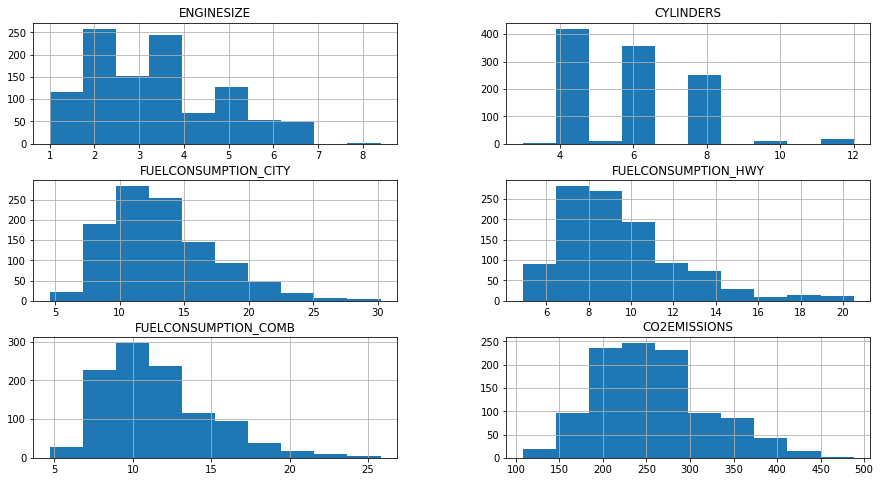

In [5]:
hist_graphs = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
                  'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
hist_graphs.hist(figsize=(15,8))
plt.show() 

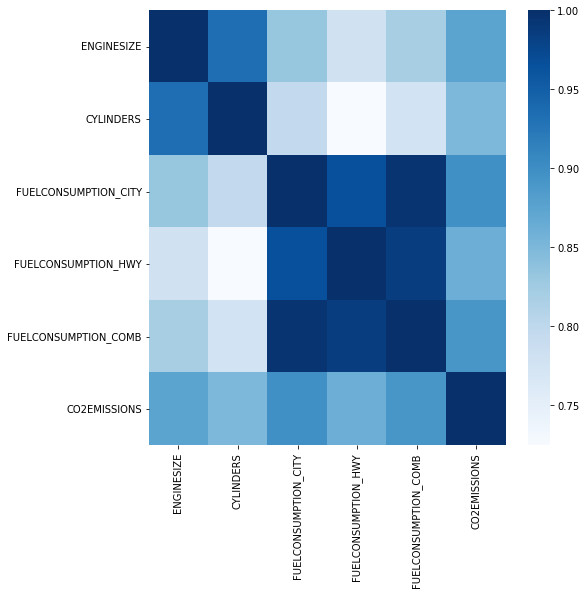

In [6]:
fig, axes = plt.subplots(1, 1, figsize=(8,8)) # plot 6 graphs 
sns.heatmap(df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
                'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
                'CO2EMISSIONS']].corr(), cmap="Blues")

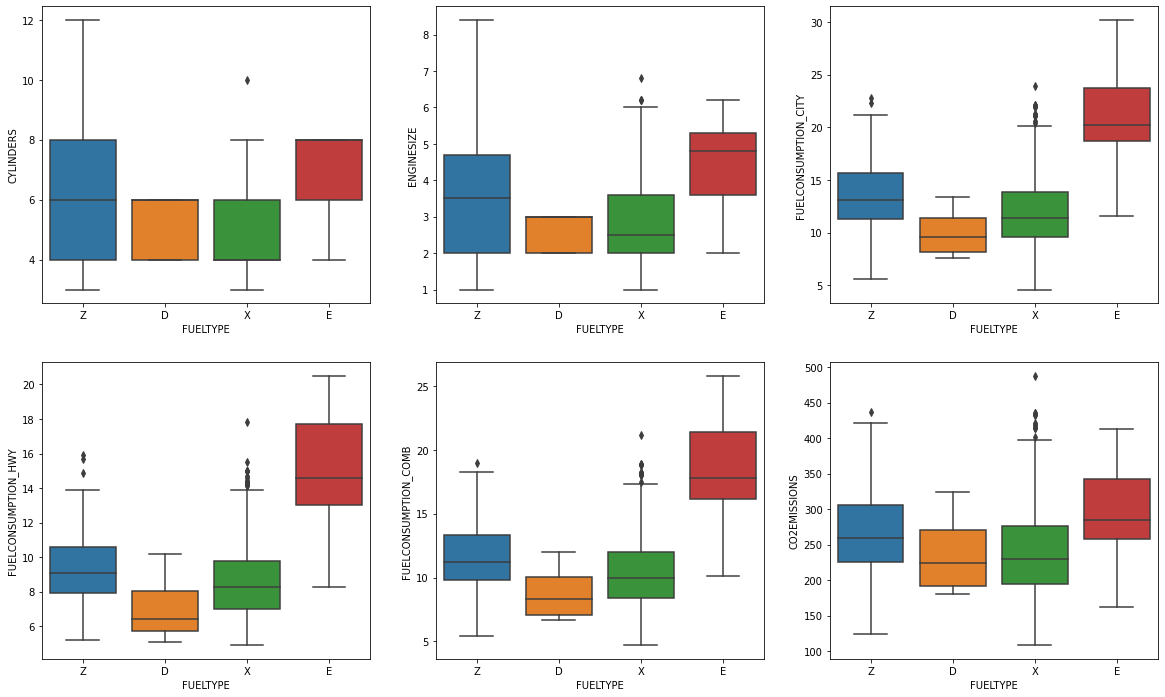

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(20,12)) # plot 6 graphs 
sns.boxplot(data=df, x='FUELTYPE', y='CYLINDERS', ax=axes[0][0])
sns.boxplot(data=df, x='FUELTYPE', y='ENGINESIZE', ax=axes[0][1])
sns.boxplot(data=df, x='FUELTYPE', y='FUELCONSUMPTION_CITY', ax=axes[0][2])
sns.boxplot(data=df, x='FUELTYPE', y='FUELCONSUMPTION_HWY', ax=axes[1][0])
sns.boxplot(data=df, x='FUELTYPE', y='FUELCONSUMPTION_COMB', ax=axes[1][1])
sns.boxplot(data=df, x='FUELTYPE', y='CO2EMISSIONS', ax=axes[1][2])

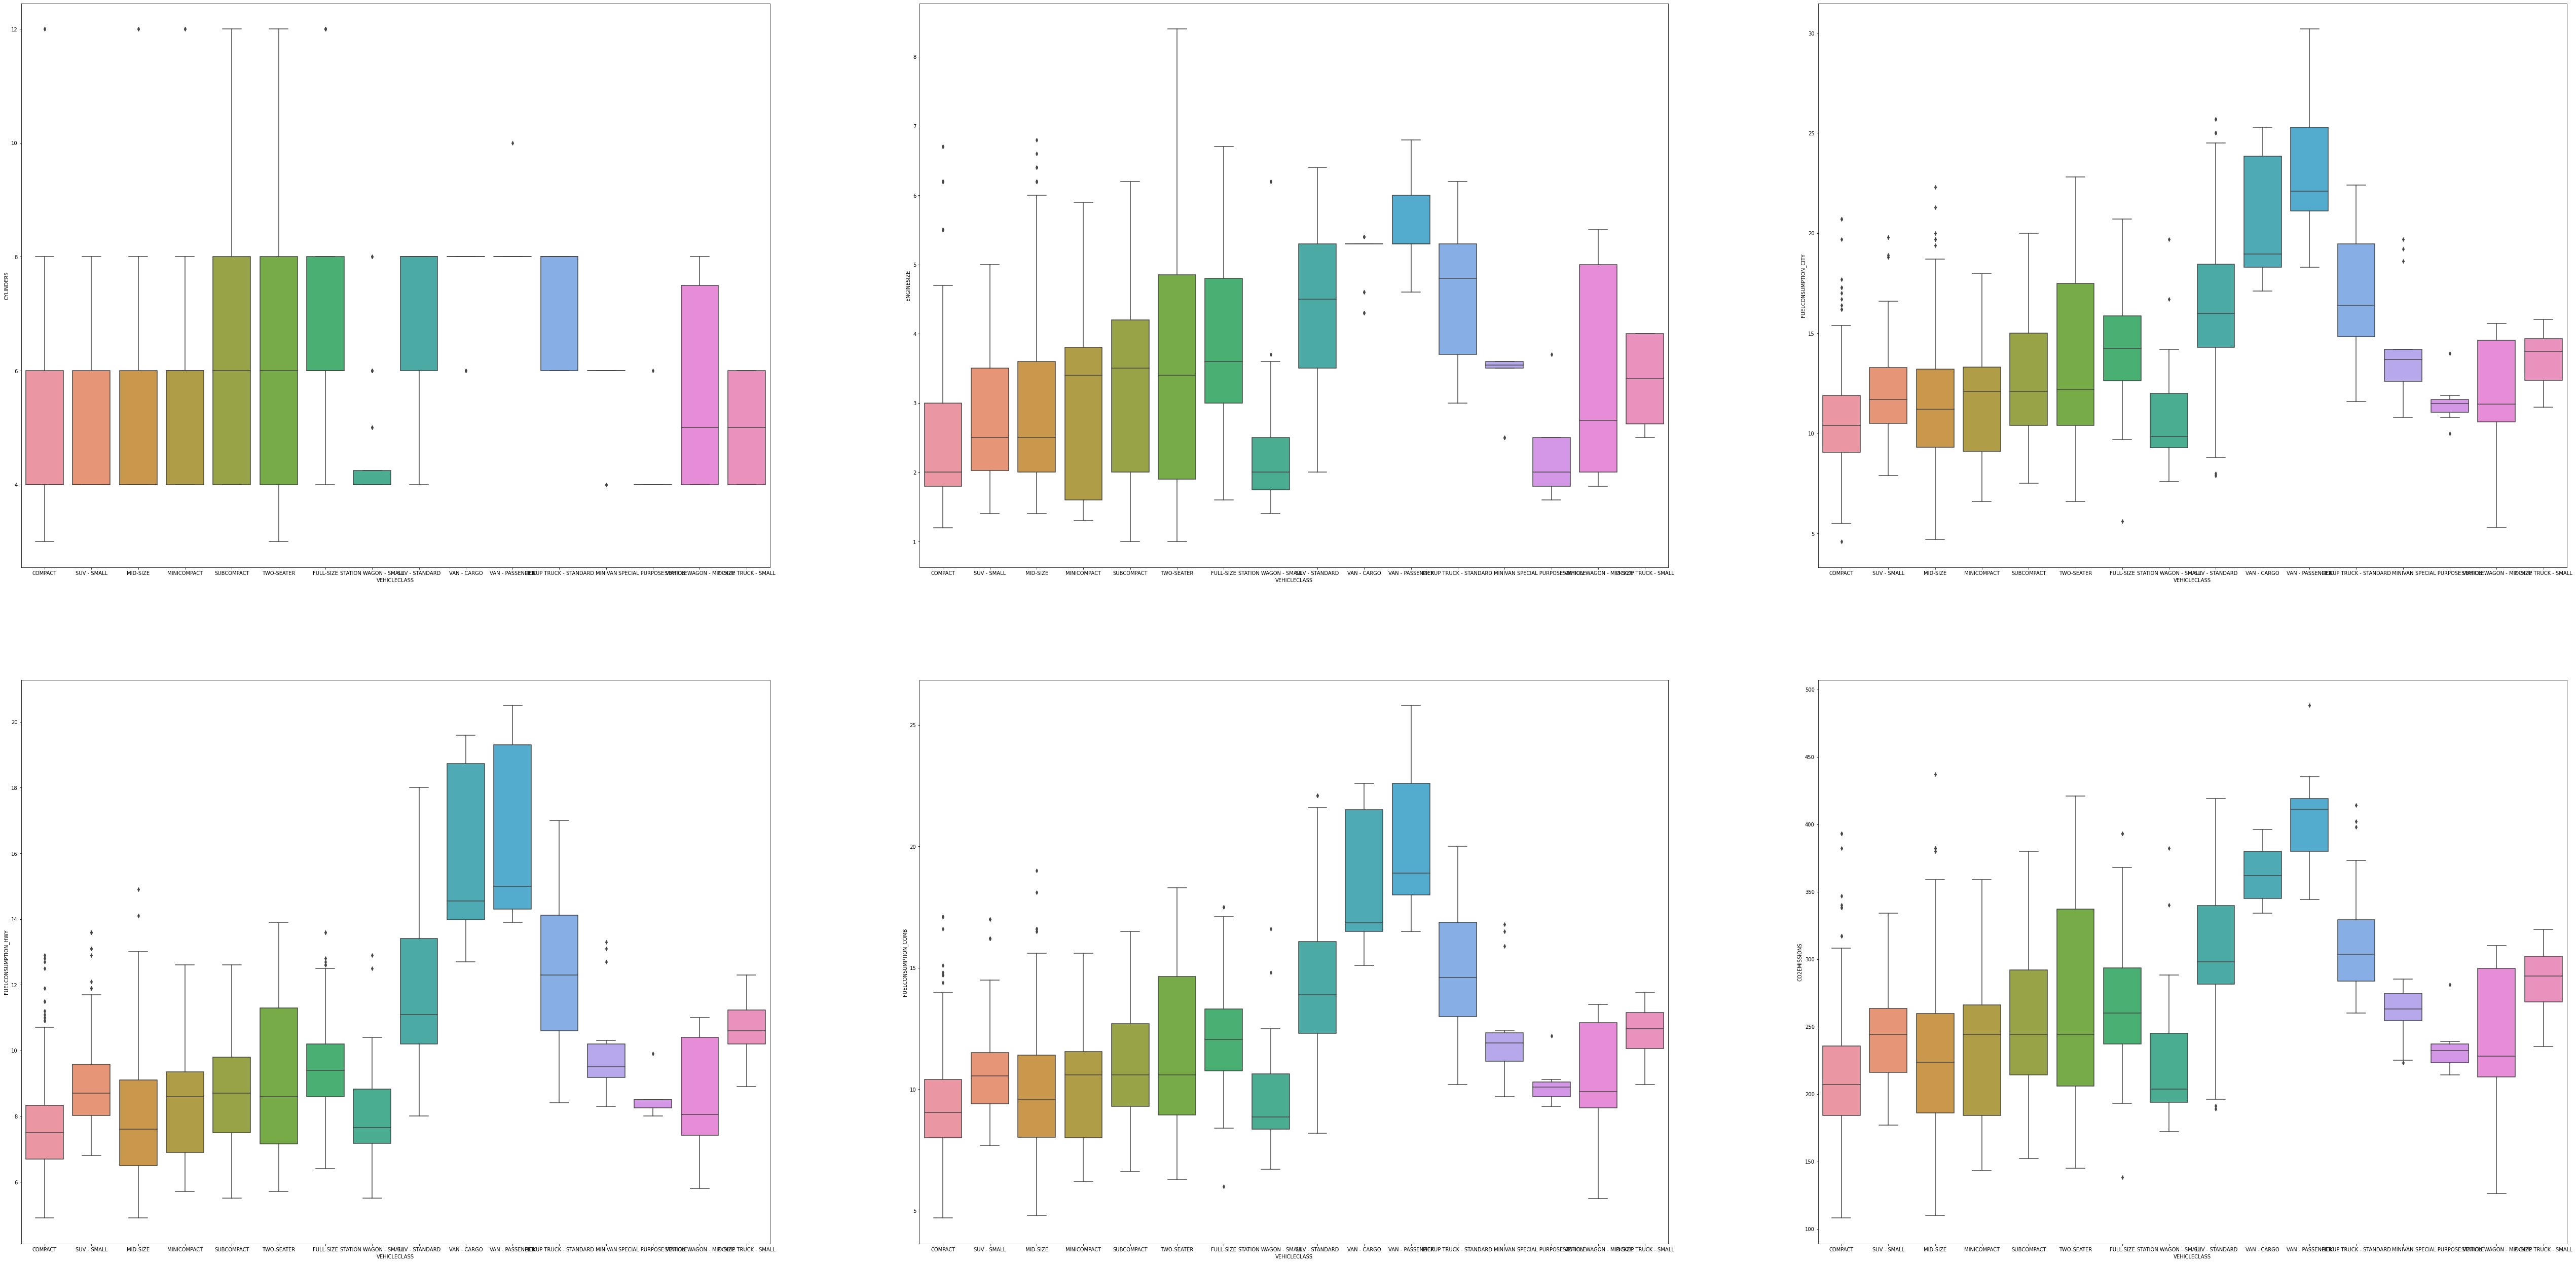

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(90,45)) # plot 6 graphs 
sns.boxplot(data=df, x='VEHICLECLASS', y='CYLINDERS', ax=axes[0][0])
sns.boxplot(data=df, x='VEHICLECLASS', y='ENGINESIZE', ax=axes[0][1])
sns.boxplot(data=df, x='VEHICLECLASS', y='FUELCONSUMPTION_CITY', ax=axes[0][2])
sns.boxplot(data=df, x='VEHICLECLASS', y='FUELCONSUMPTION_HWY', ax=axes[1][0])
sns.boxplot(data=df, x='VEHICLECLASS', y='FUELCONSUMPTION_COMB', ax=axes[1][1])
sns.boxplot(data=df, x='VEHICLECLASS', y='CO2EMISSIONS', ax=axes[1][2])

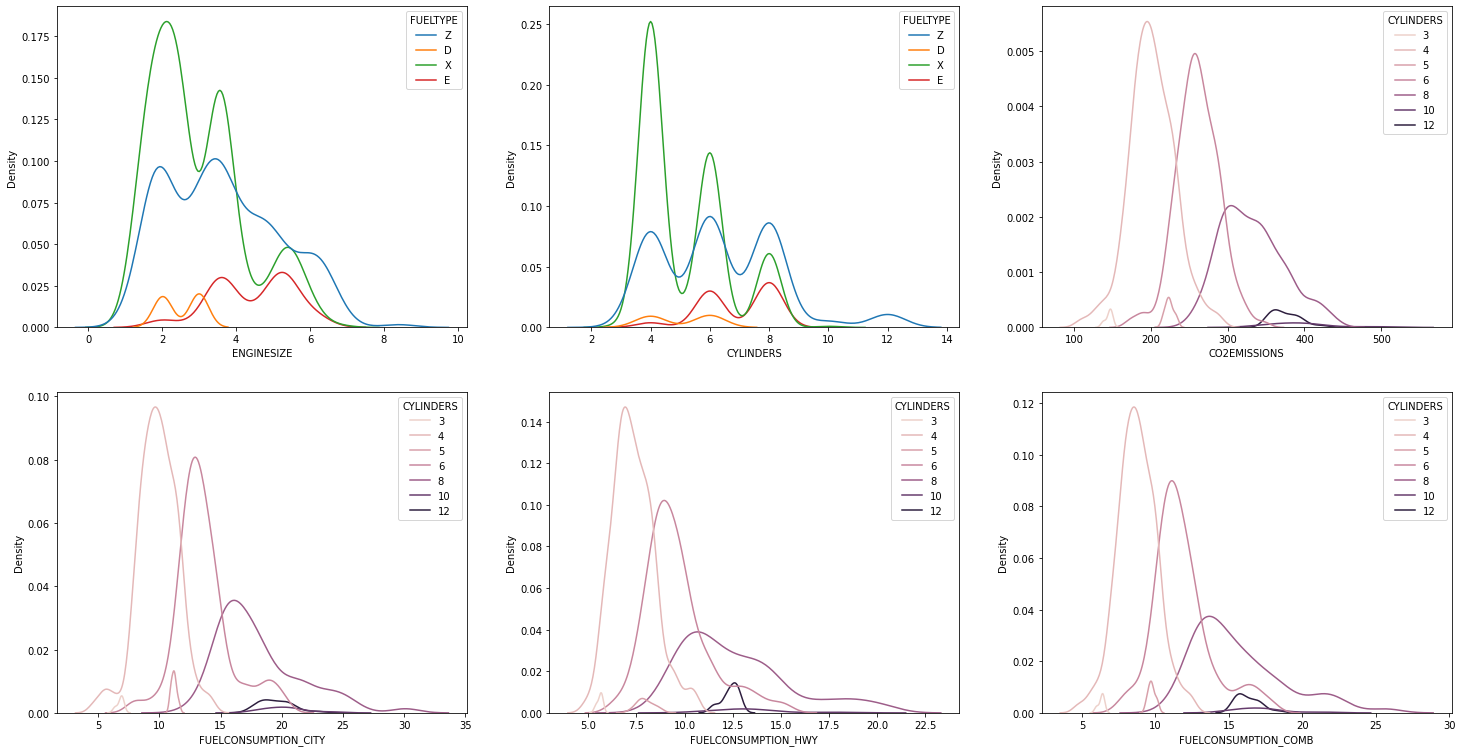

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(25,13)) # plot 6 graphs 
sns.kdeplot(data=df, x='ENGINESIZE', hue='FUELTYPE', ax=axes[0][0])
sns.kdeplot(data=df, x='CYLINDERS', hue='FUELTYPE', ax=axes[0][1])
sns.kdeplot(data=df, x='CO2EMISSIONS', hue='CYLINDERS', ax=axes[0][2])
sns.kdeplot(data=df, x='FUELCONSUMPTION_CITY', hue='CYLINDERS', ax=axes[1][0])
sns.kdeplot(data=df, x='FUELCONSUMPTION_HWY', hue='CYLINDERS', ax=axes[1][1])
sns.kdeplot(data=df, x='FUELCONSUMPTION_COMB', hue='CYLINDERS', ax=axes[1][2])

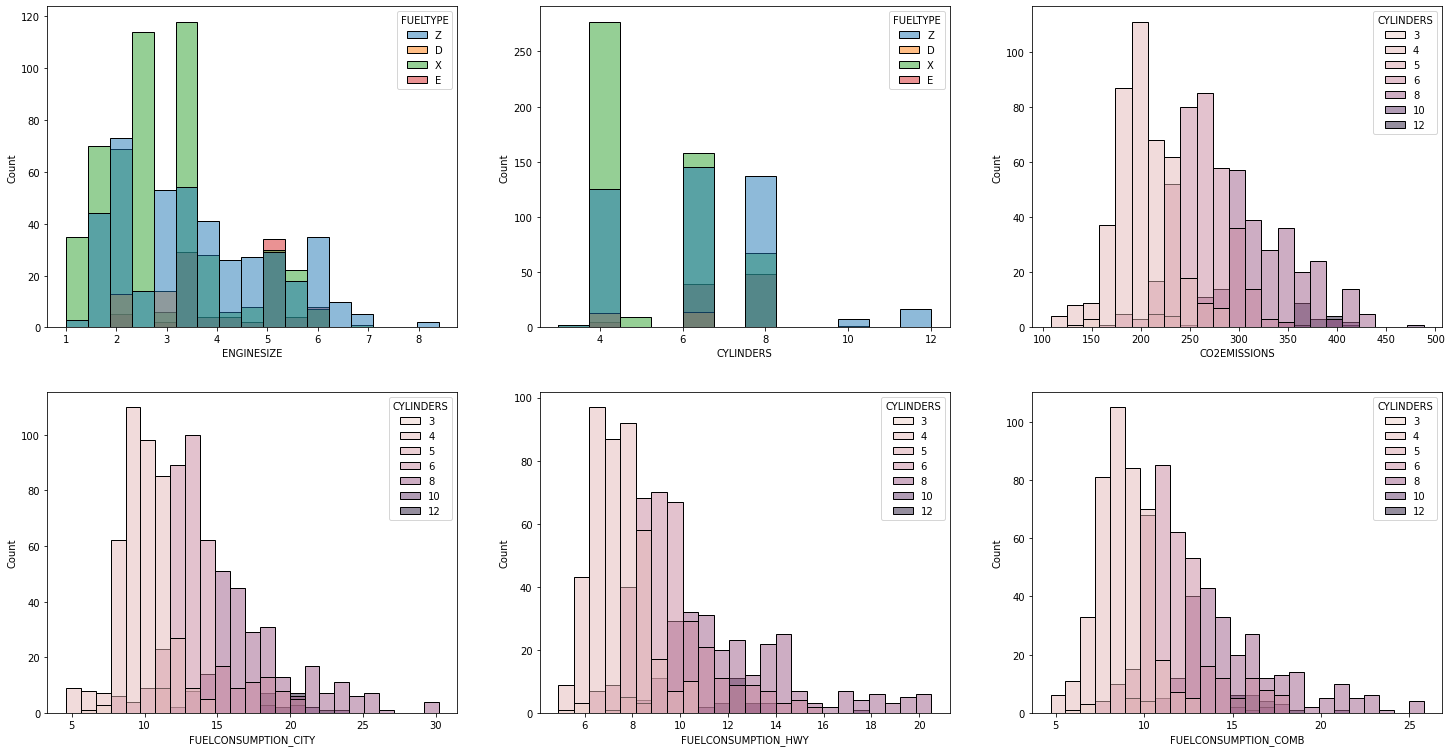

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(25,13)) # plot 6 graphs 
sns.histplot(data=df, x='ENGINESIZE', hue='FUELTYPE', ax=axes[0][0])
sns.histplot(data=df, x='CYLINDERS', hue='FUELTYPE', ax=axes[0][1])
sns.histplot(data=df, x='CO2EMISSIONS', hue='CYLINDERS', ax=axes[0][2])
sns.histplot(data=df, x='FUELCONSUMPTION_CITY', hue='CYLINDERS', ax=axes[1][0])
sns.histplot(data=df, x='FUELCONSUMPTION_HWY', hue='CYLINDERS', ax=axes[1][1])
sns.histplot(data=df, x='FUELCONSUMPTION_COMB', hue='CYLINDERS', ax=axes[1][2])

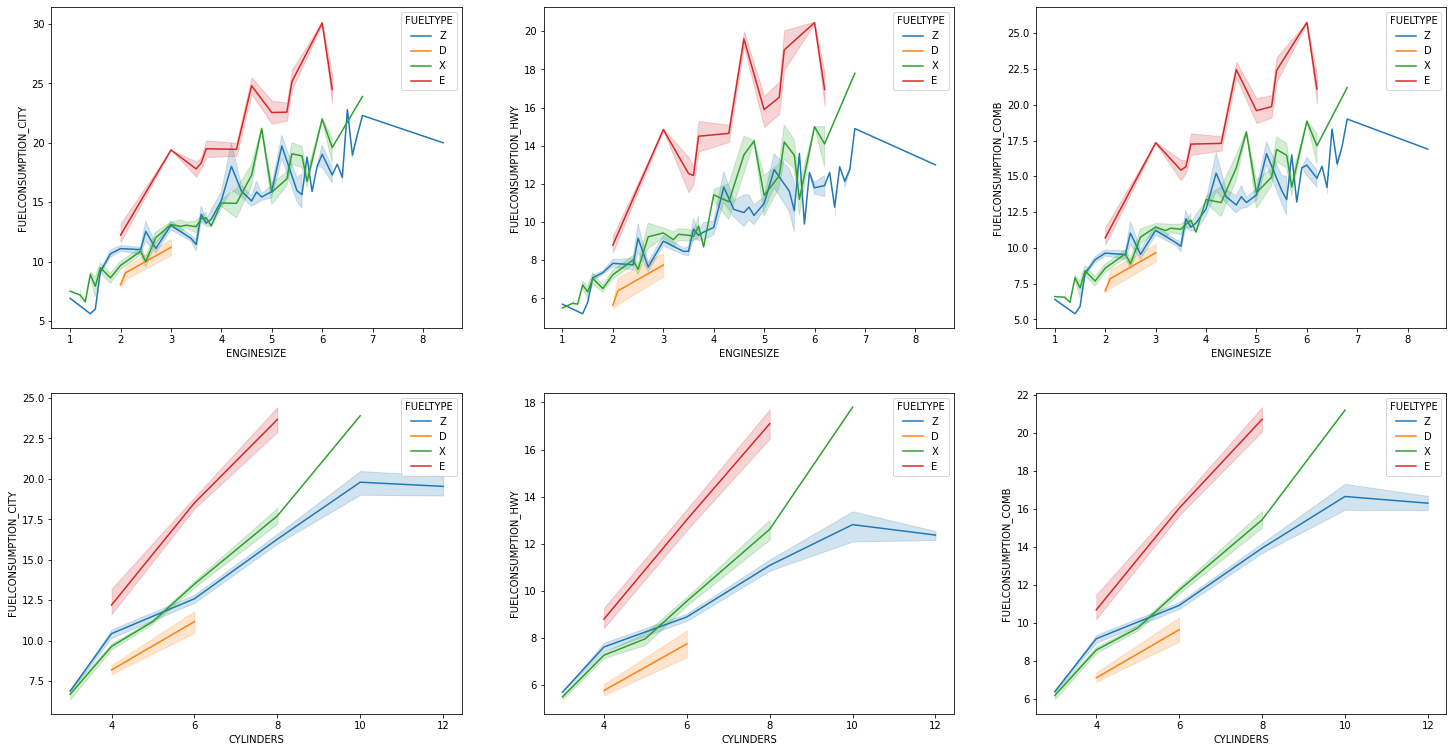

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(25,13)) # plot 6 graphs 
sns.lineplot(data=df, x='ENGINESIZE', y='FUELCONSUMPTION_CITY', hue='FUELTYPE',
             ax=axes[0][0])
sns.lineplot(data=df, x='ENGINESIZE', y='FUELCONSUMPTION_HWY', hue='FUELTYPE',
             ax=axes[0][1])
sns.lineplot(data=df, x='ENGINESIZE', y='FUELCONSUMPTION_COMB', hue='FUELTYPE',
             ax=axes[0][2])
sns.lineplot(data=df, x='CYLINDERS', y='FUELCONSUMPTION_CITY', hue='FUELTYPE',
             ax=axes[1][0])
sns.lineplot(data=df, x='CYLINDERS', y='FUELCONSUMPTION_HWY', hue='FUELTYPE',
             ax=axes[1][1])
sns.lineplot(data=df, x='CYLINDERS', y='FUELCONSUMPTION_COMB', hue='FUELTYPE',
             ax=axes[1][2])

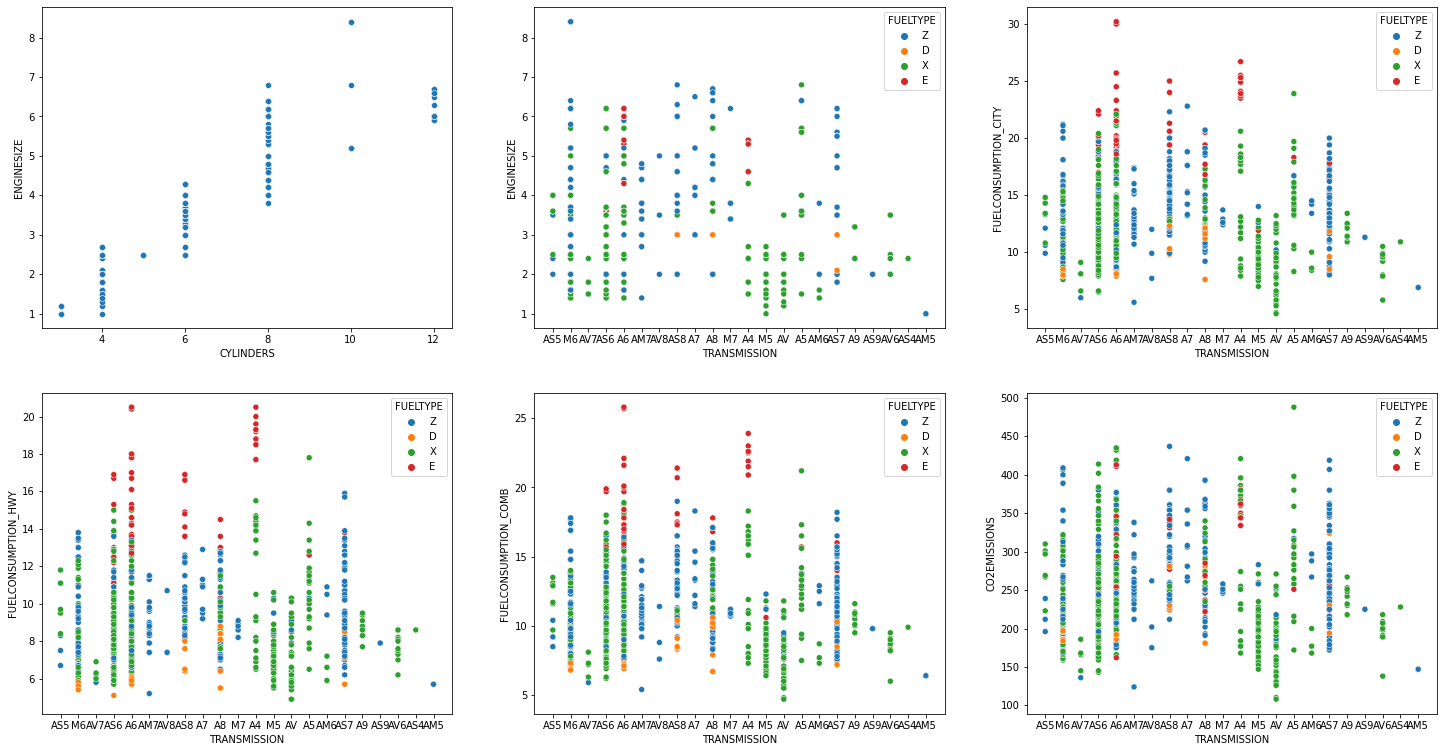

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(25,13)) # plot 6 graphs 
sns.scatterplot(data=df, x='CYLINDERS', y='ENGINESIZE', ax=axes[0][0])
sns.scatterplot(data=df, x='TRANSMISSION', y='ENGINESIZE', hue='FUELTYPE',
                ax=axes[0][1])
sns.scatterplot(data=df, x='TRANSMISSION', y='FUELCONSUMPTION_CITY',
                hue='FUELTYPE', ax=axes[0][2])
sns.scatterplot(data=df, x='TRANSMISSION', y='FUELCONSUMPTION_HWY', 
                hue='FUELTYPE', ax=axes[1][0])
sns.scatterplot(data=df, x='TRANSMISSION', y='FUELCONSUMPTION_COMB', 
                hue='FUELTYPE', ax=axes[1][1])
sns.scatterplot(data=df, x='TRANSMISSION', y='CO2EMISSIONS', hue='FUELTYPE',
                ax=axes[1][2])

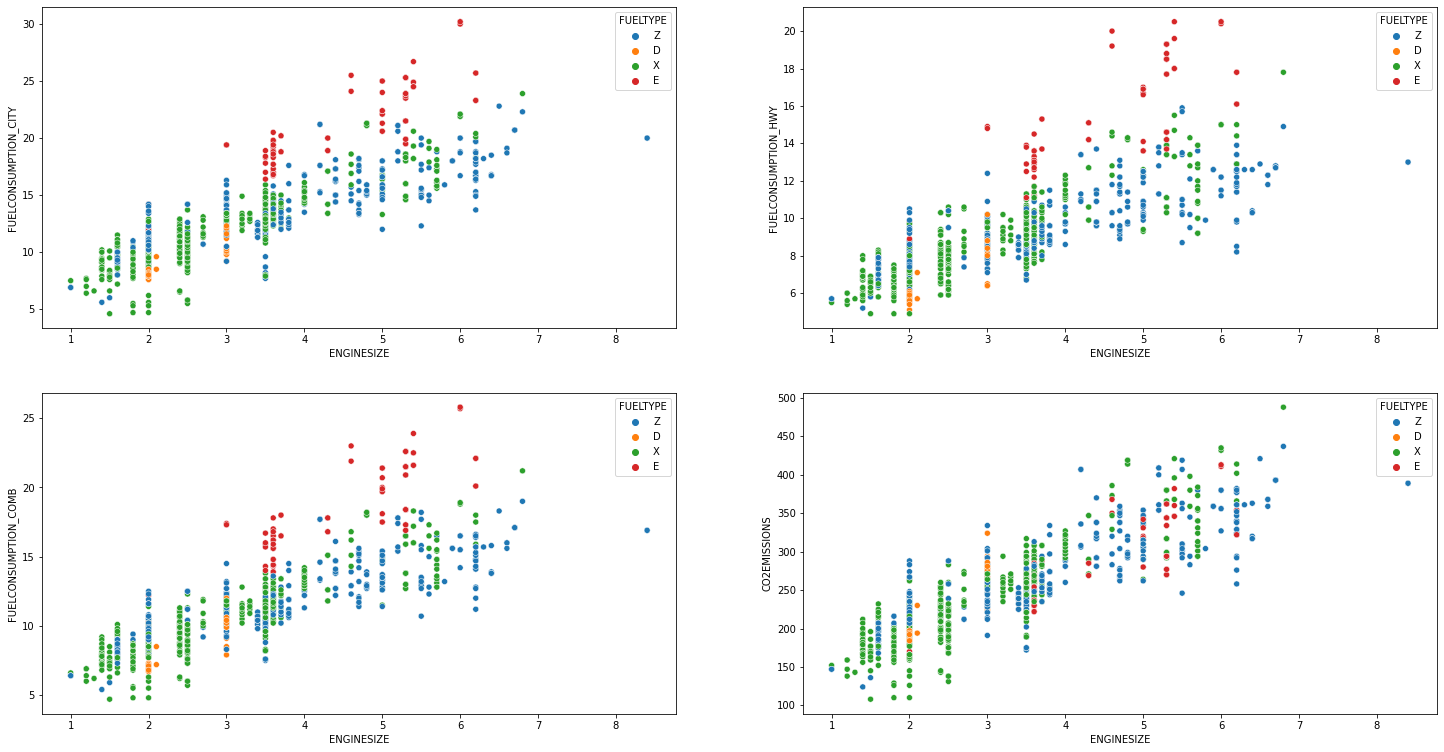

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(25,13)) # plot 4 graphs 
sns.scatterplot(data=df, x='ENGINESIZE', y='FUELCONSUMPTION_CITY',
                hue='FUELTYPE', ax=axes[0][0])
sns.scatterplot(data=df, x='ENGINESIZE', y='FUELCONSUMPTION_HWY', 
                hue='FUELTYPE', ax=axes[0][1])
sns.scatterplot(data=df, x='ENGINESIZE', y='FUELCONSUMPTION_COMB', 
                hue='FUELTYPE', ax=axes[1][0])
sns.scatterplot(data=df, x='ENGINESIZE', y='CO2EMISSIONS', hue='FUELTYPE',
                ax=axes[1][1])

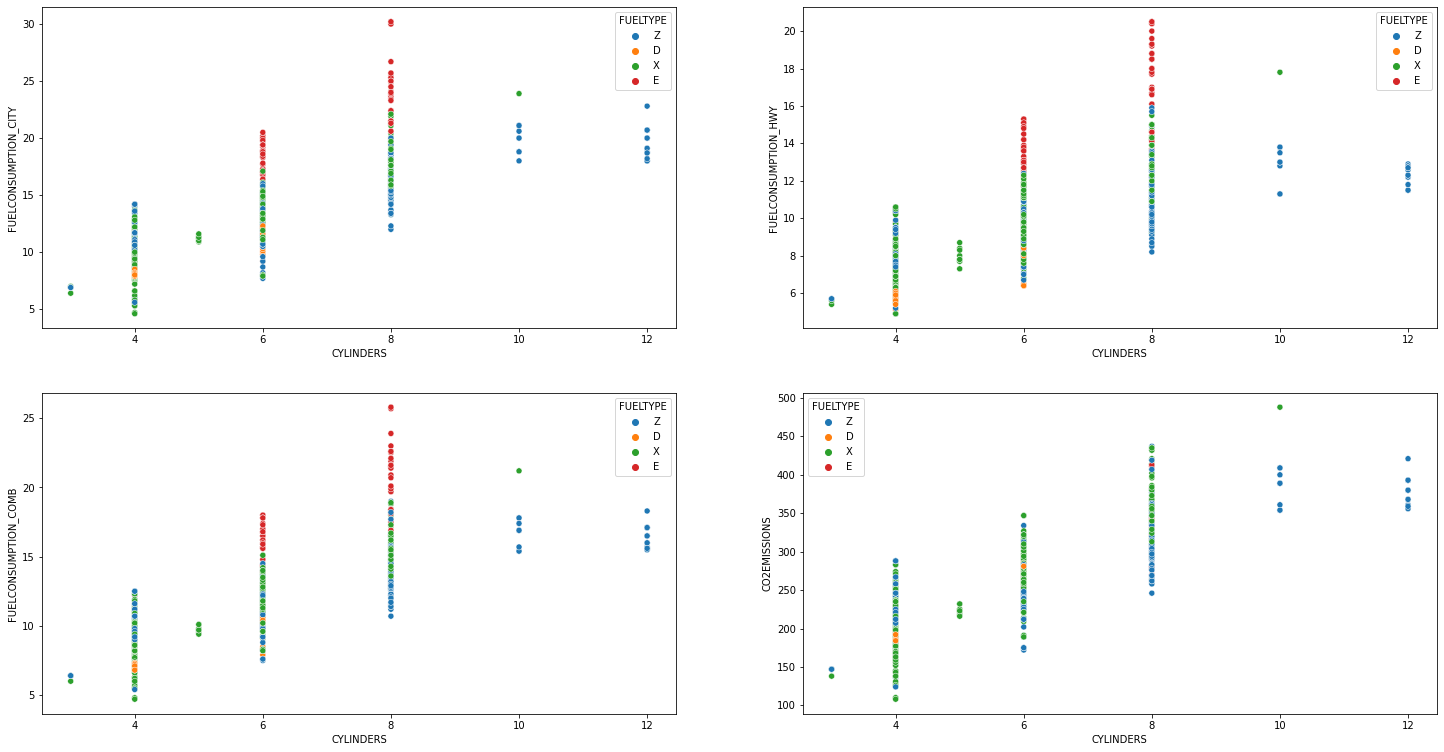

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(25,13)) # plot 4 graphs 
sns.scatterplot(data=df, x='CYLINDERS', y='FUELCONSUMPTION_CITY',
                hue='FUELTYPE', ax=axes[0][0])
sns.scatterplot(data=df, x='CYLINDERS', y='FUELCONSUMPTION_HWY', 
                hue='FUELTYPE', ax=axes[0][1])
sns.scatterplot(data=df, x='CYLINDERS', y='FUELCONSUMPTION_COMB', 
                hue='FUELTYPE', ax=axes[1][0])
sns.scatterplot(data=df, x='CYLINDERS', y='CO2EMISSIONS', hue='FUELTYPE',
                ax=axes[1][1])

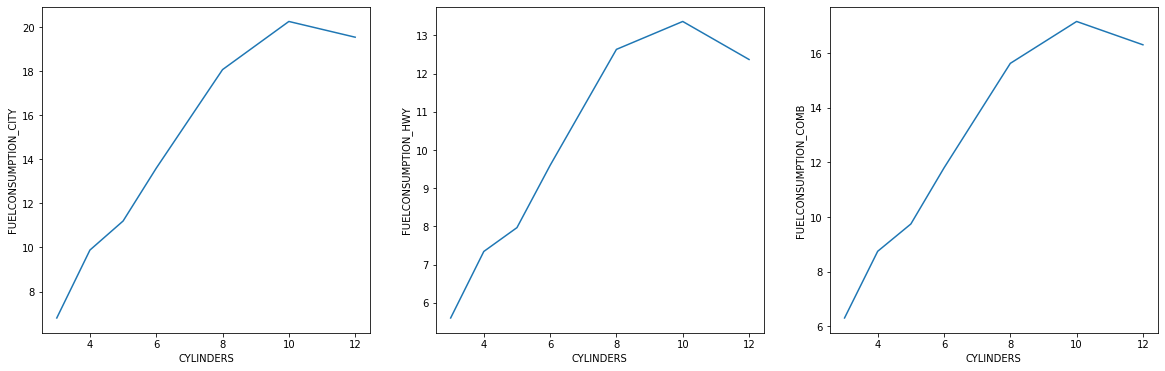

In [15]:
# Reorder the dataframe
# df_ordered_by_co2 = df.sort_values(by=['CO2EMISSIONS'])
df_grouped_cyl = df.groupby(by='CYLINDERS', as_index=False)

# df_grouped_cyl.min(numeric_only=True)
# df_grouped_cyl.mean(numeric_only=True)
# df_grouped_cyl.max(numeric_only=True)

fig, axes = plt.subplots(1, 3, figsize=(20,6)) # plot 3 graphs 
sns.lineplot(data=df_grouped_cyl.mean(numeric_only=True), x='CYLINDERS',
             y='FUELCONSUMPTION_CITY', ax=axes[0])
sns.lineplot(data=df_grouped_cyl.mean(numeric_only=True), x='CYLINDERS',
             y='FUELCONSUMPTION_HWY', ax=axes[1])
sns.lineplot(data=df_grouped_cyl.mean(numeric_only=True), x='CYLINDERS',
             y='FUELCONSUMPTION_COMB', ax=axes[2])

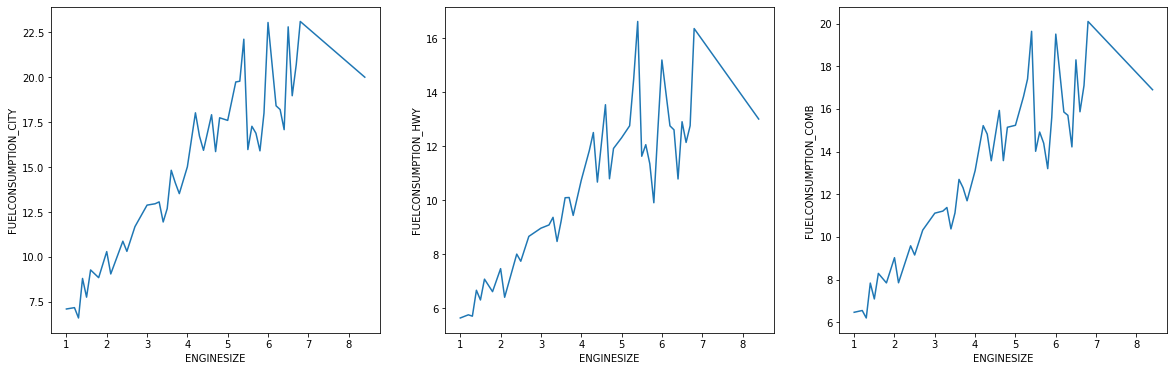

In [16]:
# Reorder the dataframe
# df_ordered_by_co2 = df.sort_values(by=['CO2EMISSIONS'])
df_grouped_size = df.groupby(by='ENGINESIZE', as_index=False)

# df_grouped_size.min(numeric_only=True)
# df_grouped_size.mean(numeric_only=True)
# df_grouped_size.max(numeric_only=True)

fig, axes = plt.subplots(1, 3, figsize=(20,6)) # plot 3 graphs 
sns.lineplot(data=df_grouped_size.mean(numeric_only=True), x='ENGINESIZE',
             y='FUELCONSUMPTION_CITY', ax=axes[0])
sns.lineplot(data=df_grouped_size.mean(numeric_only=True), x='ENGINESIZE',
             y='FUELCONSUMPTION_HWY', ax=axes[1])
sns.lineplot(data=df_grouped_size.mean(numeric_only=True), x='ENGINESIZE',
             y='FUELCONSUMPTION_COMB', ax=axes[2])

# Regression

## Single Linear Regression
### Engine Size (x) / CO2 Emissions (y)

In [17]:
def linear_regression_model(x, y, x_label, y_label):
    """"This function takes in x and y in a numpy array form, and returns the
    linear regression equation, R2, MSE, and RMSE. It also graphs the whole
    thing.
    """
    model = linear_model.LinearRegression().fit(x, y)

    # Get the intercept (a_0) and coefficient (a_1)
    a_0 = model.intercept_
    a_1 = model.coef_

    # Scoring the prediction accuracy
    y_pred = model.predict(x)

    # R2, MSE and RMSE
    r_score = r2_score(y, y_pred)
    MSE = mean_squared_error(y,y_pred)
    RMSE = np.sqrt(mean_squared_error(y,y_pred))

    print('The linear regression equation is y = {} + {}*x'.format(a_0, a_1[0]))
    print('R2 is {} '.format(r_score))
    print('The mean squared error (MSE) is {}'.format(MSE))
    print('The root mean squared error (RMSE) is {}'.format(RMSE))
    print()

    # Graph
    plt.scatter(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x, y_pred, c='r')

In [18]:
# Set x & y values
x, x_label = df[['ENGINESIZE']].values, list(df[['ENGINESIZE']].columns)
y, y_label = df['CO2EMISSIONS'].values, list(df[['CO2EMISSIONS']].columns)

The linear regression equation is y = 125.30409949535692 + 39.12519978671172*x
R2 is 0.7641458597854816 
The mean squared error (MSE) is 946.314052718875
The root mean squared error (RMSE) is 30.762217942126263



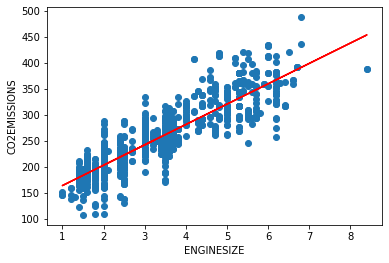

In [19]:
linear_regression_model(x, y, x_label[0], y_label[0])

### Number of cylinders (x) / CO2 Emissions (y)

In [20]:
# Set x & y values
x, x_label = df[['CYLINDERS']].values, list(df[['CYLINDERS']].columns)
y, y_label = df['CO2EMISSIONS'].values, list(df[['CO2EMISSIONS']].columns)

In [21]:
linear_regression_model(x, y, x_label[0], y_label[0])

The linear regression equation is y = 82.63419906705187 + 29.957190618705432*x
R2 is 0.7219639059061919 
The mean squared error (MSE) is 1115.560077786762
The root mean squared error (RMSE) is 33.400001164472464



### City Fuel Consumption (x) / CO2 Emissions (y)

In [22]:
# Set x & y values
x, x_label = df[['FUELCONSUMPTION_CITY']].values, list(df[['FUELCONSUMPTION_CITY']].columns)
y, y_label = df['CO2EMISSIONS'].values, list(df[['CO2EMISSIONS']].columns)

In [23]:
linear_regression_model(x, y, x_label[0], y_label[0])

The linear regression equation is y = 71.72022839690194 + 13.876433758159045*x
R2 is 0.8064731689191343 
The mean squared error (MSE) is 776.4848209295999
The root mean squared error (RMSE) is 27.865477224149597



### Highway Fuel Consumption (x) / CO2 Emissions (y)

In [24]:
# Set x & y values
x, x_label = df[['FUELCONSUMPTION_HWY']].values, list(df[['FUELCONSUMPTION_HWY']].columns)
y, y_label = df['CO2EMISSIONS'].values, list(df[['CO2EMISSIONS']].columns)

The linear regression equation is y = 71.07387671909768 + 19.54222540810758*x
R2 is 0.7426095205342778 
The mean squared error (MSE) is 1032.7239858198955
The root mean squared error (RMSE) is 32.13602317991284



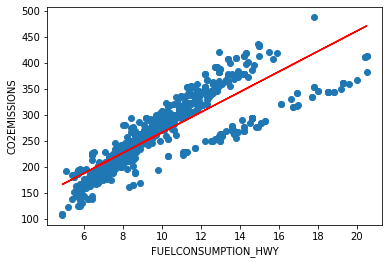

In [25]:
linear_regression_model(x, y, x_label[0], y_label[0])

### Combined Fuel Consumption (x) / CO2 Emissions (y)

In [26]:
# Set x & y values
x, x_label = df[['FUELCONSUMPTION_COMB']].values, list(df[['FUELCONSUMPTION_COMB']].columns)
y, y_label = df['CO2EMISSIONS'].values, list(df[['CO2EMISSIONS']].columns)

The linear regression equation is y = 68.38713348317268 + 16.219970265234913*x
R2 is 0.7958934270115507 
The mean squared error (MSE) is 818.9337617545483
The root mean squared error (RMSE) is 28.61701874330288



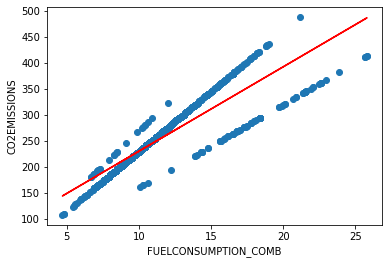

In [27]:
linear_regression_model(x, y, x_label[0], y_label[0])

## Multi Linear Regression
### Engine Size and Cylinders (x) / CO2 Emissions (y)

In [28]:
def mlinear_regression_model(x, y, x_label, y_label):
    """"This function takes in x and y in a numpy array form, and returns the
    linear regression equation, R2, MSE, and RMSE. It also graphs the whole
    thing.

    This function only works with either 2 x variables or 3. In the case of 3 x
    variables there will be no graph.
    """
    model = linear_model.LinearRegression().fit(x, y)

    # Get the intercept (a_0) and coefficients (a_1 / a_2)
    a_0 = model.intercept_
    a_1 = model.coef_[0]
    a_2 = model.coef_[1]

    if len(x_label) == 3:
        a_3 = model.coef_[2]
    else:
        a_3 = None

    # Scoring the prediction accuracy
    y_pred = model.predict(x)

    # R2, MSE and RMSE
    r_score = r2_score(y, y_pred)
    MSE = mean_squared_error(y,y_pred)
    RMSE = np.sqrt(mean_squared_error(y,y_pred))

    if len(x_label) == 2:
        print('The linear regression equation is y = {} + {}*x_1 + {}*x_2'.format(a_0, a_1, a_2))
    else:
        print('The linear regression equation is y = {} + {}*x_1 + {}*x_2 + {}*x_3'.format(a_0, a_1, a_2, a_3))
    print('R2 is {} '.format(r_score))
    print('The mean squared error (MSE) is {}'.format(MSE))
    print('The root mean squared error (RMSE) is {}'.format(RMSE))
    print()

    if len(x_label) == 2:
        # Graph
        fig = plt.figure(figsize=(8, 6), dpi=100)
        mpl.rcParams['legend.fontsize'] = 12
        ax = fig.gca(projection ='3d')
        ax.view_init(45, 45)

        ax.scatter(x[:, 0], x[:, 1], y)
        ax.plot(x[:, 0], x[:, 1], y_pred, c='r')
        ax.set_xlabel(x_label[0])
        ax.set_ylabel(x_label[1])
        ax.set_zlabel(y_label[0])
        # ax.legend()
        plt.show()
    else:
        return

In [29]:
# Set x & y values
x, x_label = df[['ENGINESIZE', 'CYLINDERS']].values, list(df[['ENGINESIZE', 'CYLINDERS']].columns)
y, y_label = df['CO2EMISSIONS'].values, list(df[['CO2EMISSIONS']].columns)

The linear regression equation is y = 108.53955081938793 + 28.245330201501677*x_1 + 9.175860875182172*x_2
R2 is 0.7727903706210701 
The mean squared error (MSE) is 911.6298106904857
The root mean squared error (RMSE) is 30.19320802250873



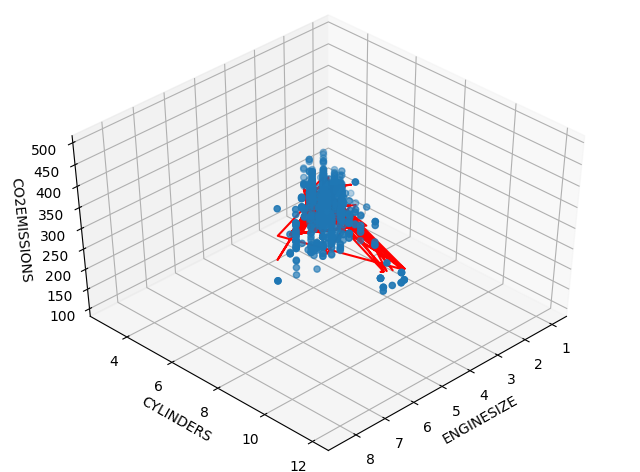

In [30]:
mlinear_regression_model(x, y, x_label, y_label)

### Engine Size and Cylinders (x) / City Fuel Consumption (y)

In [31]:
# Set x & y values
x, x_label = df[['ENGINESIZE', 'CYLINDERS']].values, list(df[['ENGINESIZE', 'CYLINDERS']].columns)
y, y_label = df['FUELCONSUMPTION_CITY'].values, list(df[['FUELCONSUMPTION_CITY']].columns)

In [32]:
mlinear_regression_model(x, y, x_label, y_label)

The linear regression equation is y = 4.603891487680437 + 2.0043223959119887*x_1 + 0.3426515717356007*x_2
R2 is 0.6954766165376248 
The mean squared error (MSE) is 5.11736766953042
The root mean squared error (RMSE) is 2.262159956663193



### Engine Size and Cylinders (x) / Highway Fuel Consumption (y)

In [33]:
# Set x & y values
x, x_label = df[['ENGINESIZE', 'CYLINDERS']].values, list(df[['ENGINESIZE', 'CYLINDERS']].columns)
y, y_label = df['FUELCONSUMPTION_HWY'].values, list(df[['FUELCONSUMPTION_HWY']].columns)

The linear regression equation is y = 4.392883034031637 + 1.576900113639215*x_1 + -0.033661338033409885*x_2
R2 is 0.6065048311288813 
The mean squared error (MSE) is 3.0700373978376625
The root mean squared error (RMSE) is 1.7521522187976883



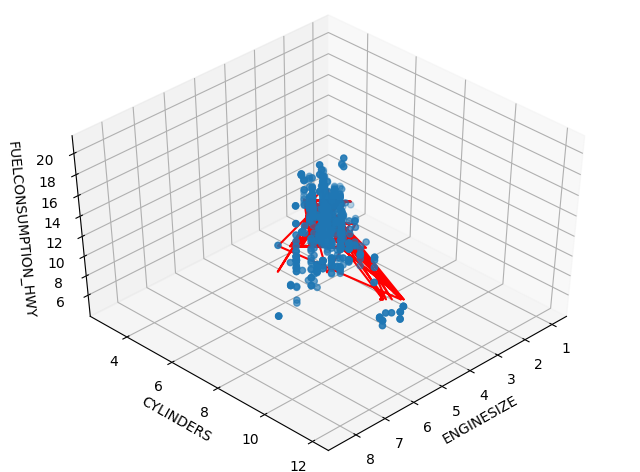

In [34]:
mlinear_regression_model(x, y, x_label, y_label)

### Engine Size and Cylinders (x) / Combined Fuel Consumption (y)

In [35]:
# Set x & y values
x, x_label = df[['ENGINESIZE', 'CYLINDERS']].values, list(df[['ENGINESIZE', 'CYLINDERS']].columns)
y, y_label = df['FUELCONSUMPTION_COMB'].values, list(df[['FUELCONSUMPTION_COMB']].columns)

The linear regression equation is y = 4.514165237016541 + 1.8122923529260586*x_1 + 0.1729574391041336*x_2
R2 is 0.6725662197683285 
The mean squared error (MSE) is 3.974386305851577
The root mean squared error (RMSE) is 1.9935862925520873



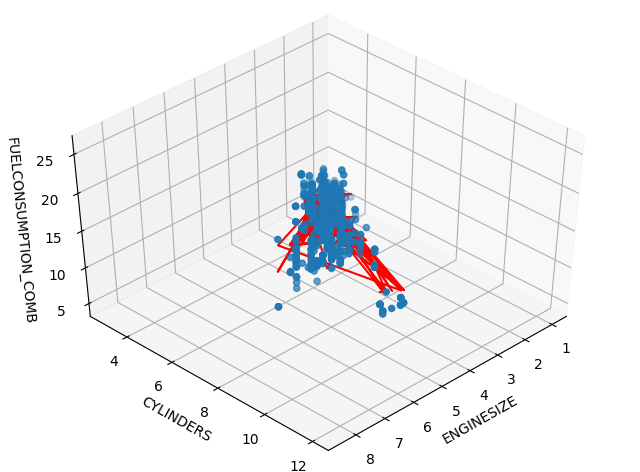

In [36]:
mlinear_regression_model(x, y, x_label, y_label)

In [37]:
# Set x & y values
x, x_label = df[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
                 'FUELCONSUMPTION_COMB']].values,\
            list(df[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
                     'FUELCONSUMPTION_COMB']].columns)
y, y_label = df['CO2EMISSIONS'].values, list(df[['CO2EMISSIONS']].columns)

In [38]:
mlinear_regression_model(x, y, x_label, y_label)

The linear regression equation is y = 72.98683881106189 + 2.4728210839161373*x_1 + -12.231096169544118*x_2 + 22.990190401967702*x_3
R2 is 0.8070306885301013 
The mean squared error (MSE) is 774.2478933011744
The root mean squared error (RMSE) is 27.825310300177684



## Polynomial Regression
### Engine Size (x) / CO2 Emissions (y)

In [39]:
def polynomial_regression_model(x, y, x_label, y_label, deg):
    """"This function takes in x and y in numpy array forms, and returns the
    polynomial regression equation, R2, MSE, and RMSE. This function works with 
    just one x variable.
    """
    # Create the polynomial regression model
    poly_reg = PolynomialFeatures(degree=deg)
    x_poly = poly_reg.fit_transform(x)

    # Create the linear regression model and fit x and y
    lin = linear_model.LinearRegression()
    lin.fit(x, y)

    # Create the linear regression model and fit x_poly and y
    lin2 = linear_model.LinearRegression()
    lin2.fit(x_poly, y)

    fig, axes = plt.subplots(1, 2, figsize=(20,6)) # plot 2 graphs 
    # Visualising the Linear Regression results
    axes[0].scatter(x, y, color = 'blue')
    axes[0].plot(x, lin.predict(x), color = 'red')
    axes[0].set_title('Linear Regression')

    # Visualising the Polynomial Regression results
    axes[1].scatter(x, y, color = 'blue')
    axes[1].plot(x, lin2.predict(poly_reg.fit_transform(x)), color = 'red')
    axes[1].set_title('Polynomial Regression')

    # Set the labels
    for ax in axes.flat:
        ax.set(xlabel=x_label, ylabel=y_label)
    
    plt.show()

In [40]:
# transmissions = set()
# for trans in df['TRANSMISSION']:
#     transmissions.add(trans)
# print(transmissions)

Transmission: A7


Transmission: AV8


Transmission: AM6


Transmission: A4


Transmission: AV


Transmission: AM5


Transmission: AS6


Transmission: AS9


Transmission: M5


Transmission: M6


Transmission: AM7


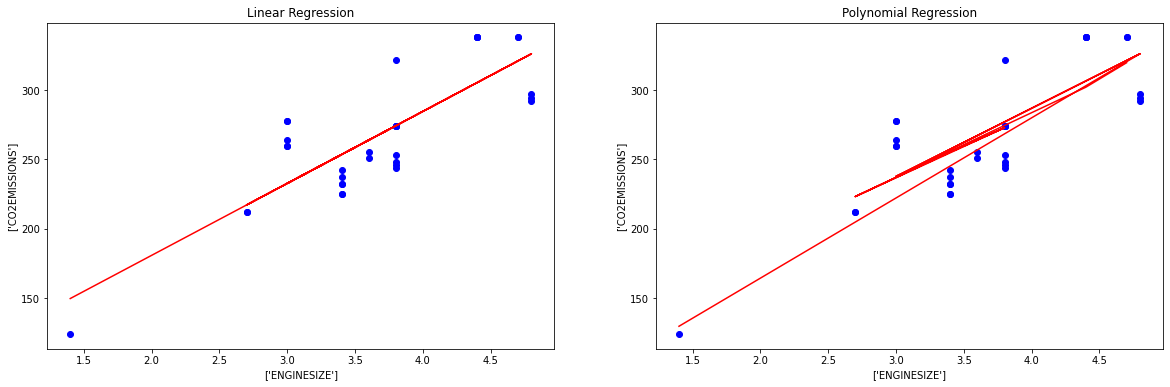

Transmission: M7


Transmission: A8


Transmission: AS5


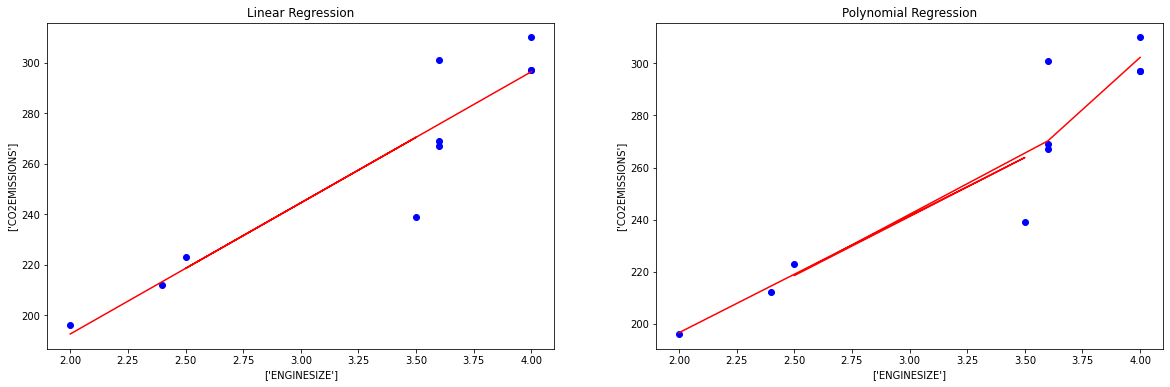

Transmission: A9


Transmission: AV6


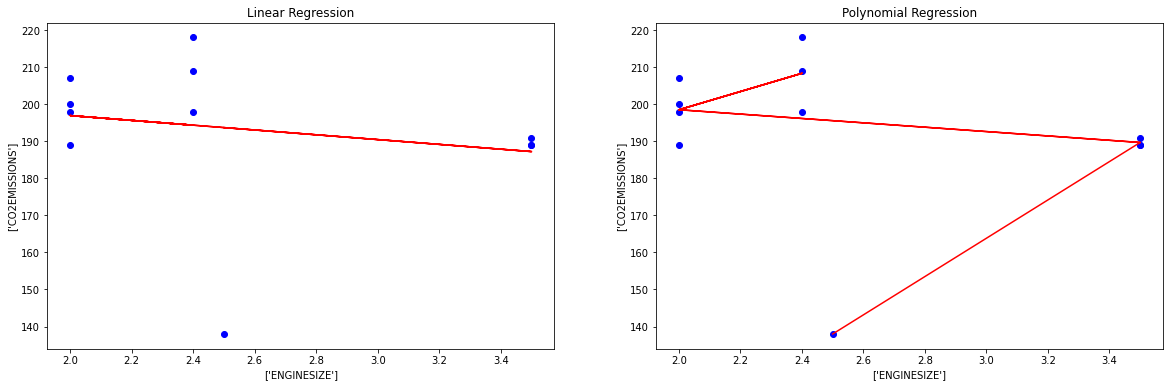

Transmission: A6


Transmission: AS4


Transmission: A5


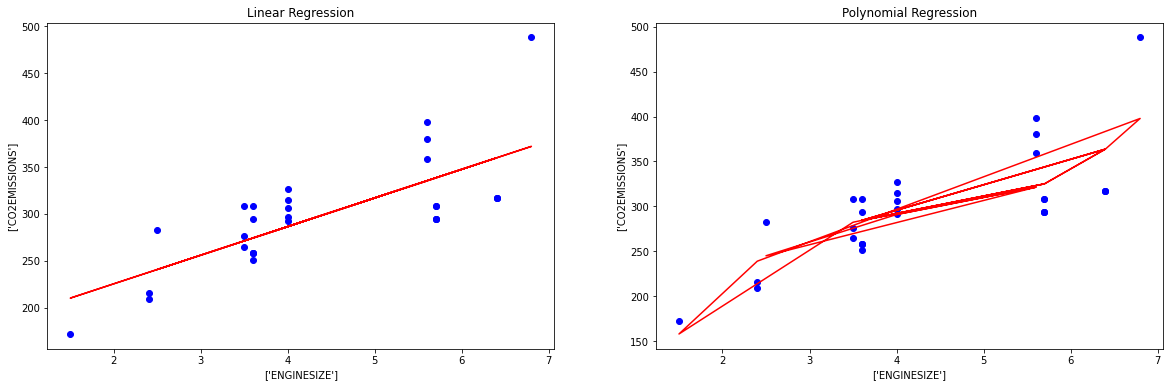

Transmission: AV7


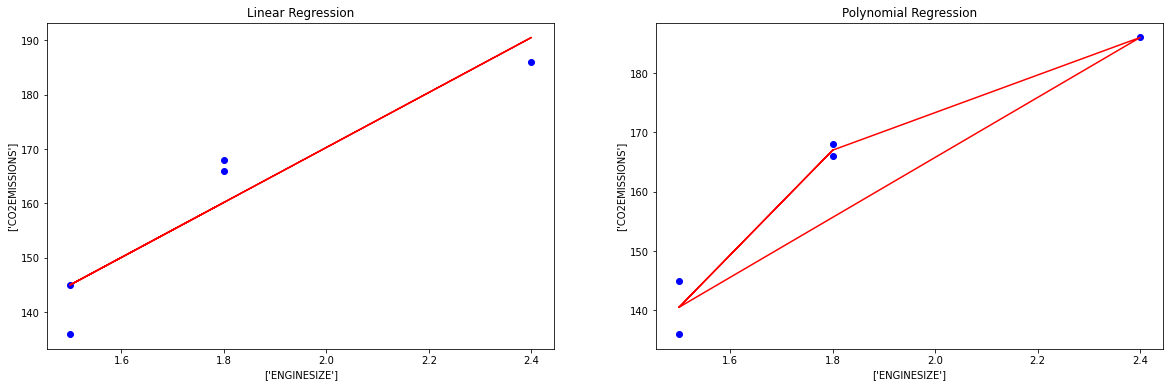

Transmission: AS8


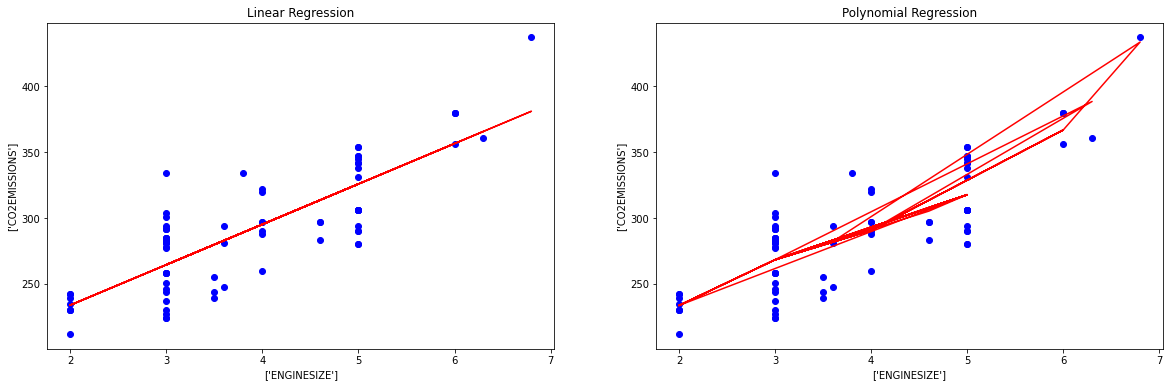

Transmission: AS7


In [41]:
# Split by transmission
for trans in set([x for x in df['TRANSMISSION']]):
    print('Transmission: {}'.format(trans))
    df_new = df[(df['TRANSMISSION'] == trans)].reset_index()
    # Set x & y values
    x, x_label = df_new[['ENGINESIZE']].values, list(df_new[['ENGINESIZE']].columns)
    y, y_label = df_new['CO2EMISSIONS'].values, list(df_new[['CO2EMISSIONS']].columns)

    polynomial_regression_model(x, y, x_label, y_label, 3)

Fuel Type: X


Fuel Type: D


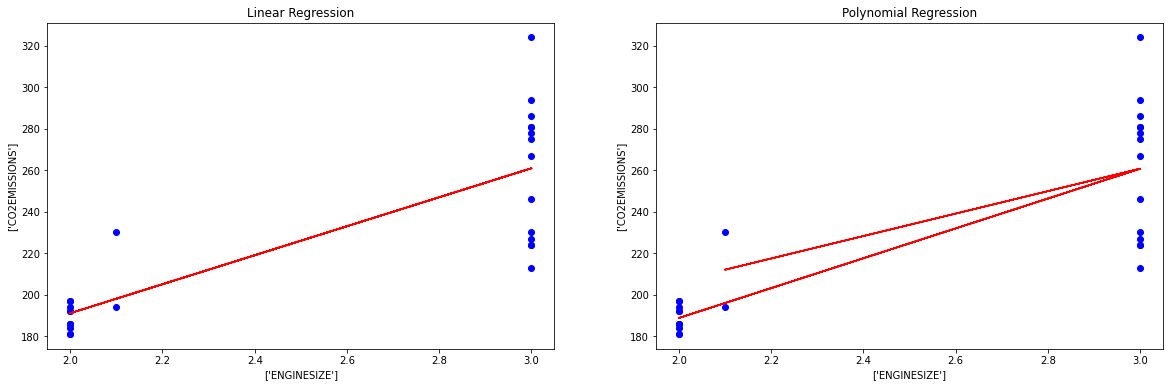

Fuel Type: Z


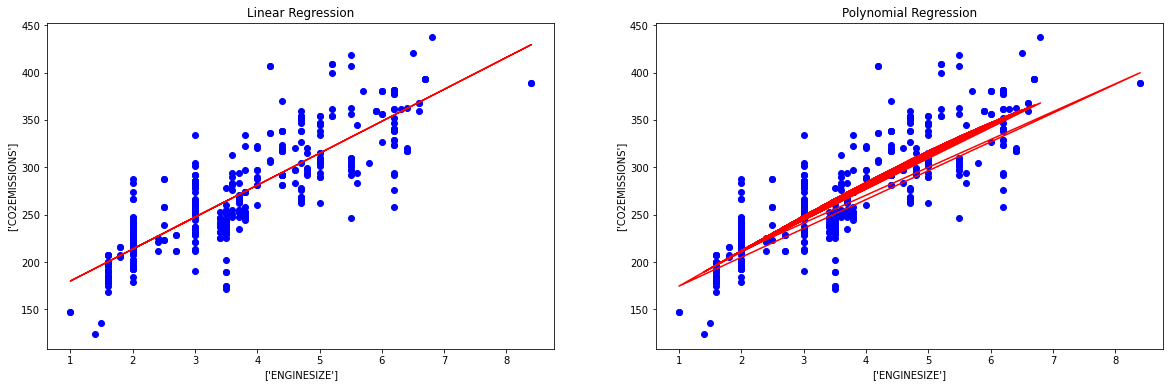

Fuel Type: E


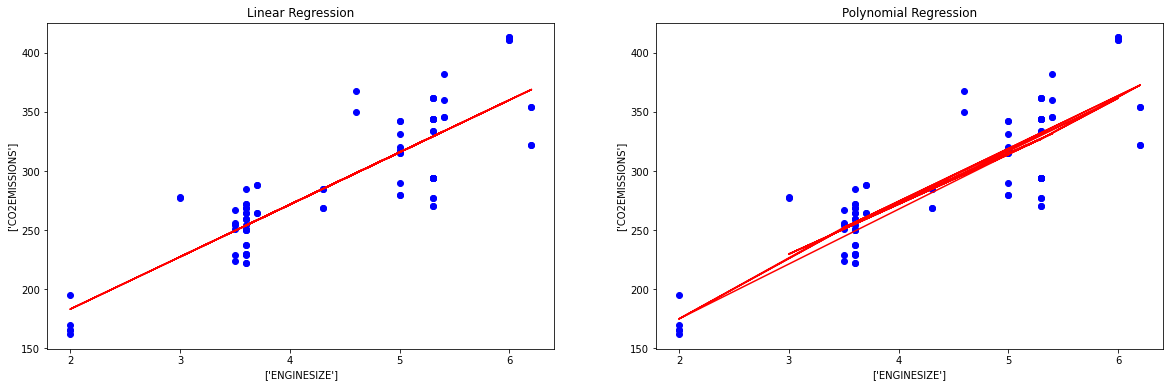

In [42]:
# Split by fuel type
for ft in set([x for x in df['FUELTYPE']]):
    print('Fuel Type: {}'.format(ft))
    df_new = df[(df['FUELTYPE'] == ft)].reset_index()
    # Set x & y values
    x, x_label = df_new[['ENGINESIZE']].values, list(df_new[['ENGINESIZE']].columns)
    y, y_label = df_new['CO2EMISSIONS'].values, list(df_new[['CO2EMISSIONS']].columns)

    polynomial_regression_model(x, y, x_label, y_label, 3)

Car Make: LAND ROVER


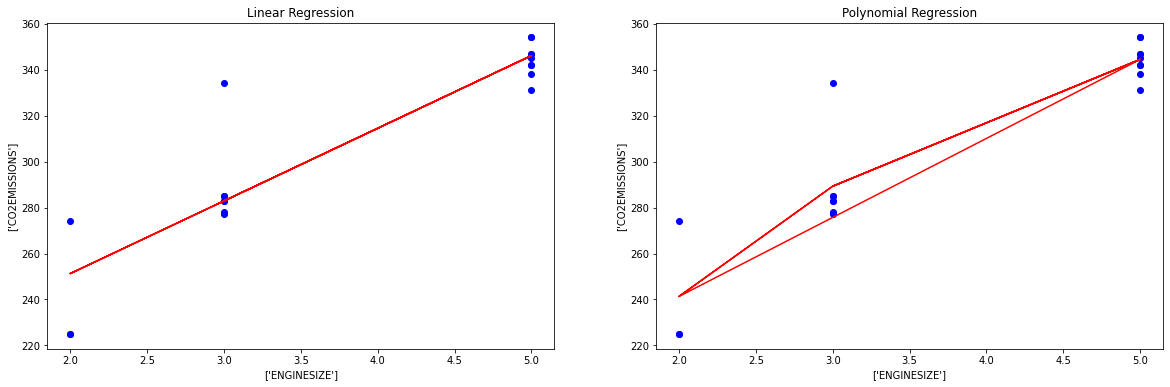

Car Make: BMW


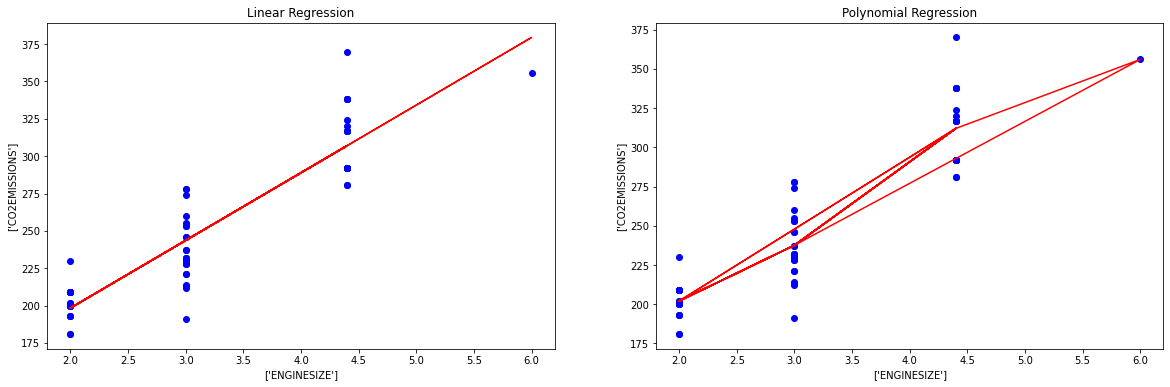

Car Make: LAMBORGHINI


Car Make: ACURA


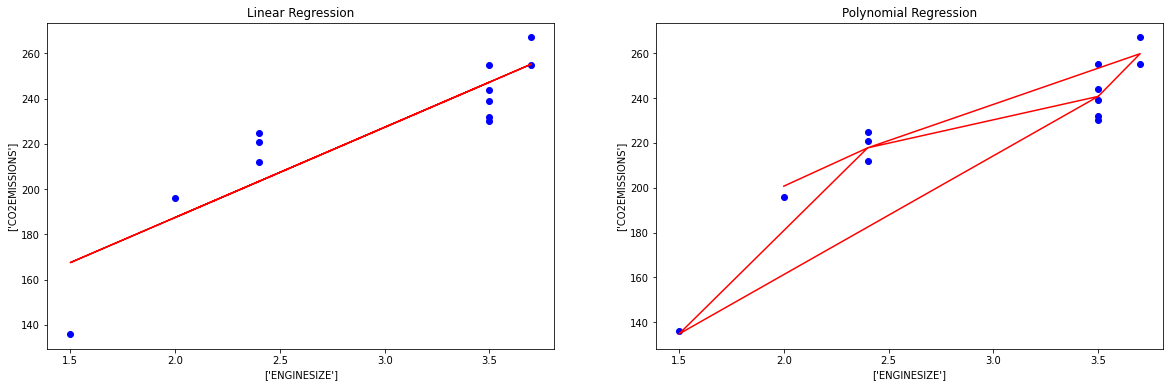

Car Make: MAZDA


Car Make: LINCOLN


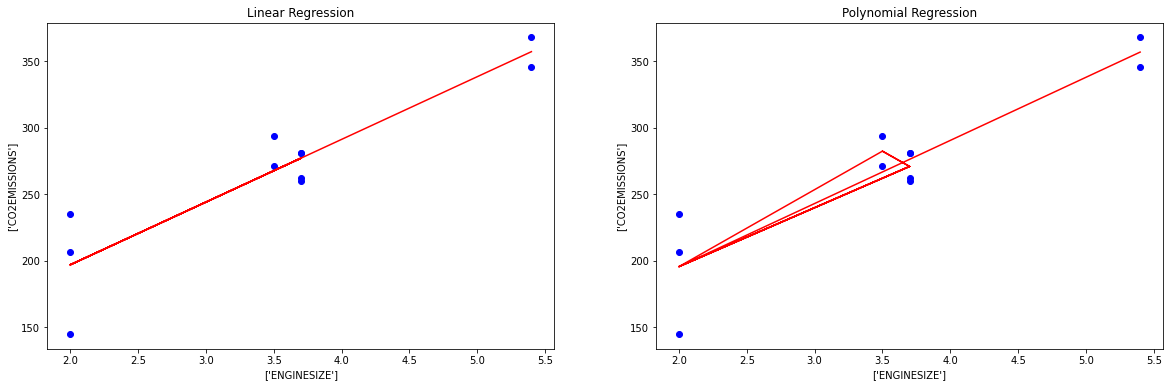

Car Make: CADILLAC


Car Make: JEEP


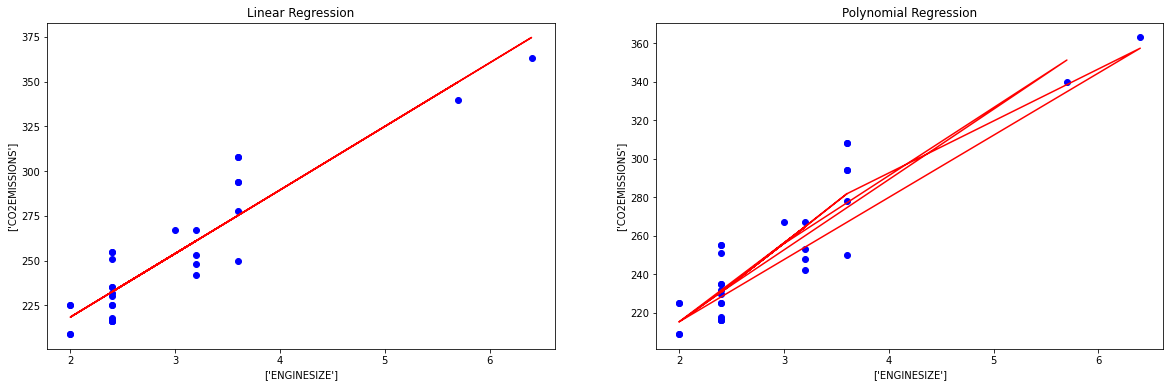

Car Make: SCION


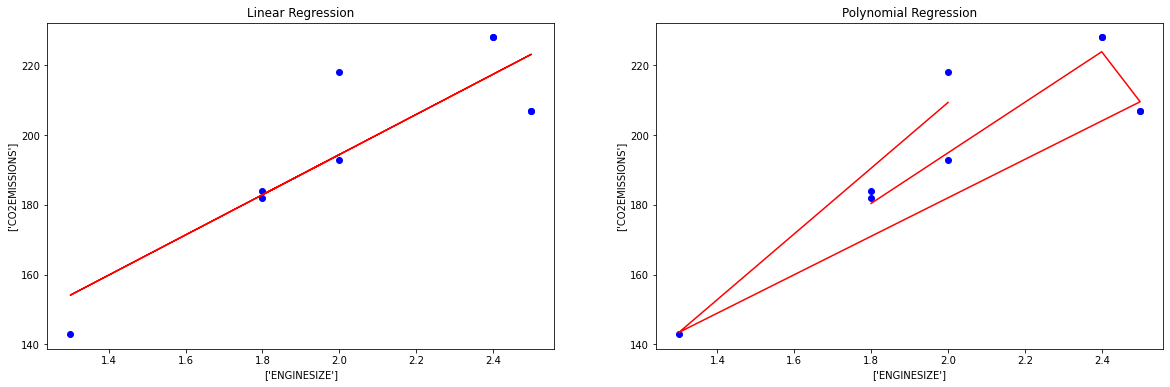

Car Make: BENTLEY


Car Make: KIA


Car Make: BUICK


Car Make: HONDA


Car Make: HYUNDAI


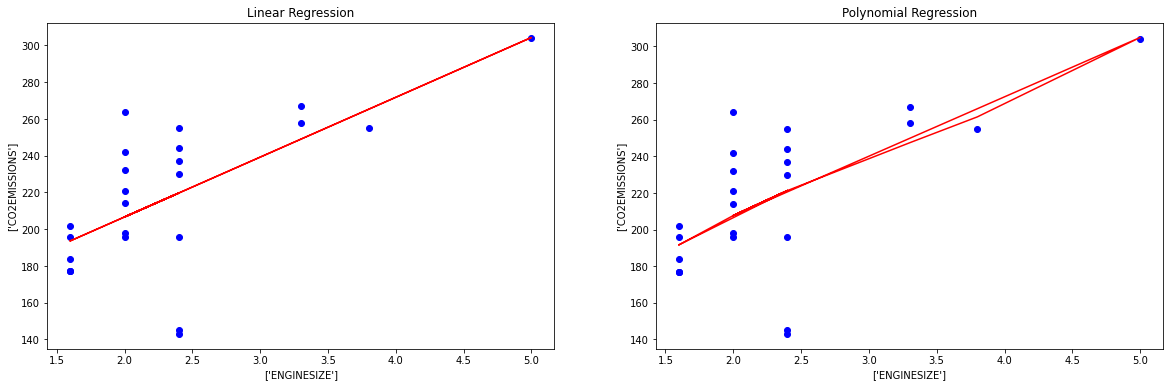

Car Make: GMC


Car Make: TOYOTA


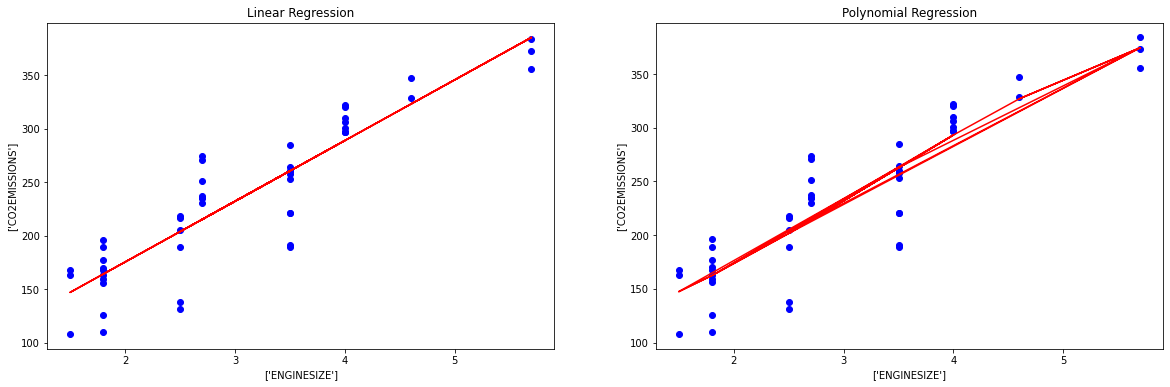

Car Make: MITSUBISHI


Car Make: ASTON MARTIN


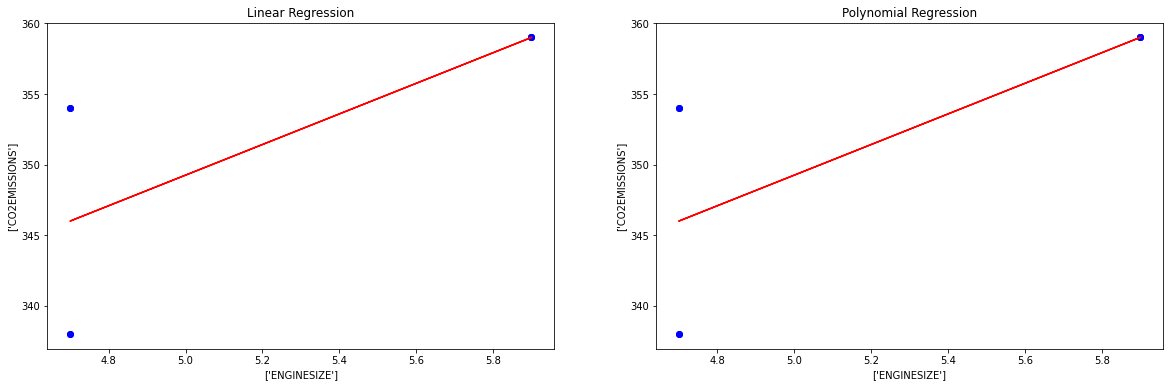

Car Make: NISSAN


Car Make: SRT


Car Make: CHRYSLER


Car Make: SMART


Car Make: PORSCHE


Car Make: FORD


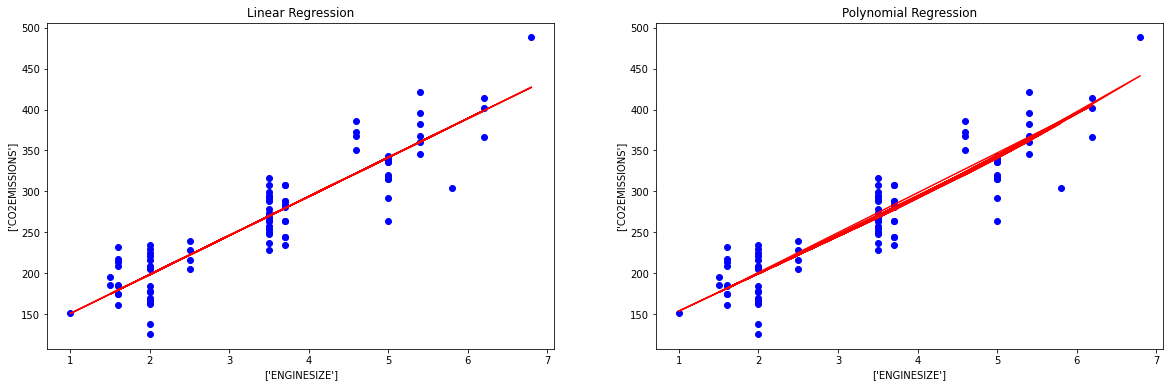

Car Make: RAM


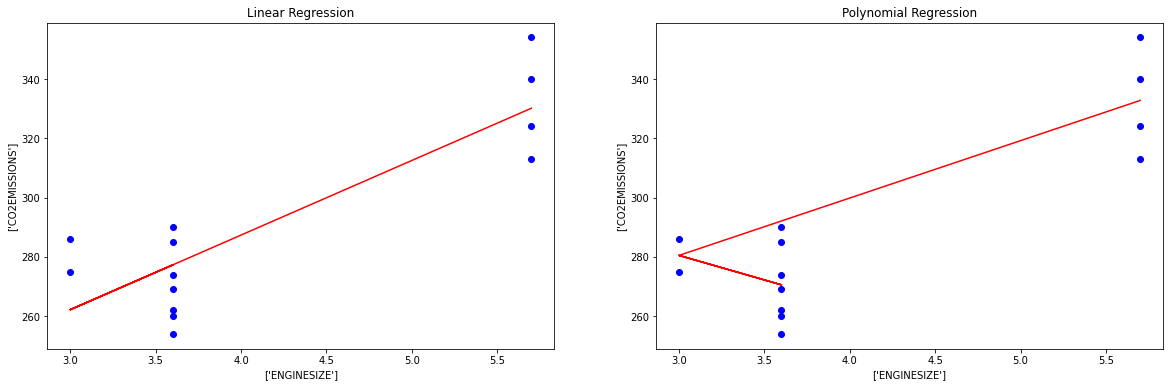

Car Make: CHEVROLET


Car Make: JAGUAR


Car Make: LEXUS


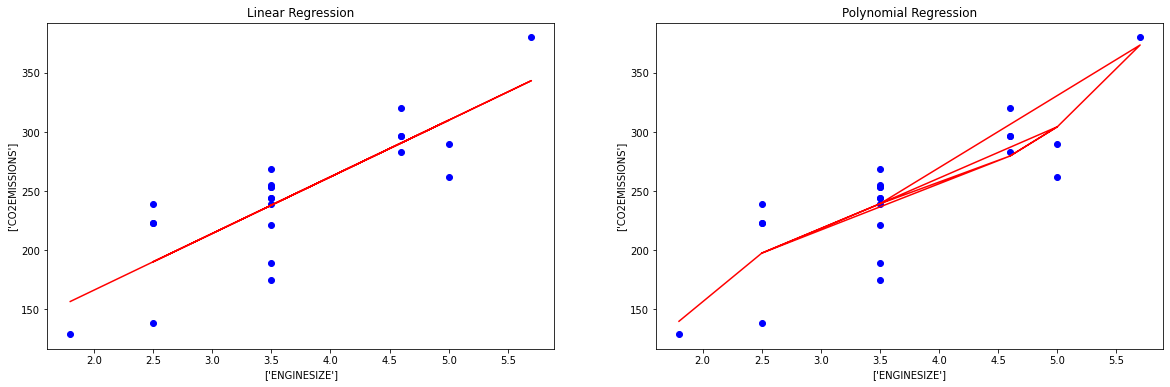

Car Make: VOLVO


Car Make: INFINITI


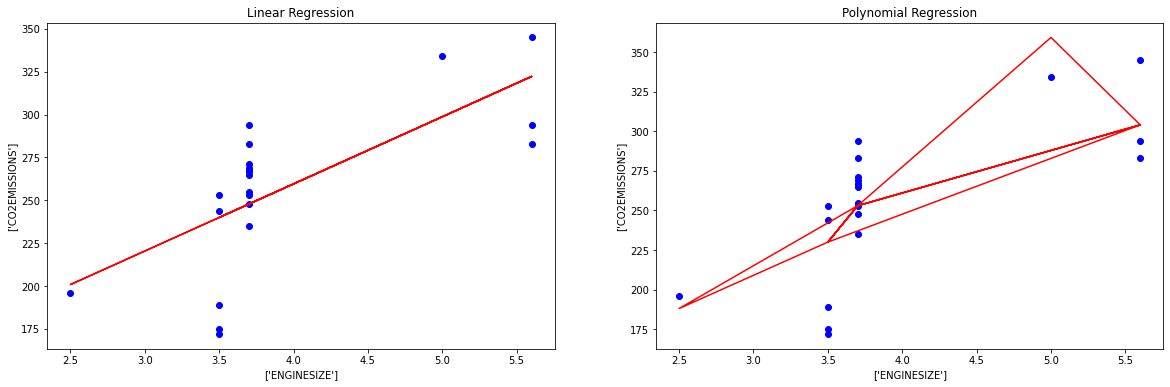

Car Make: ROLLS-ROYCE


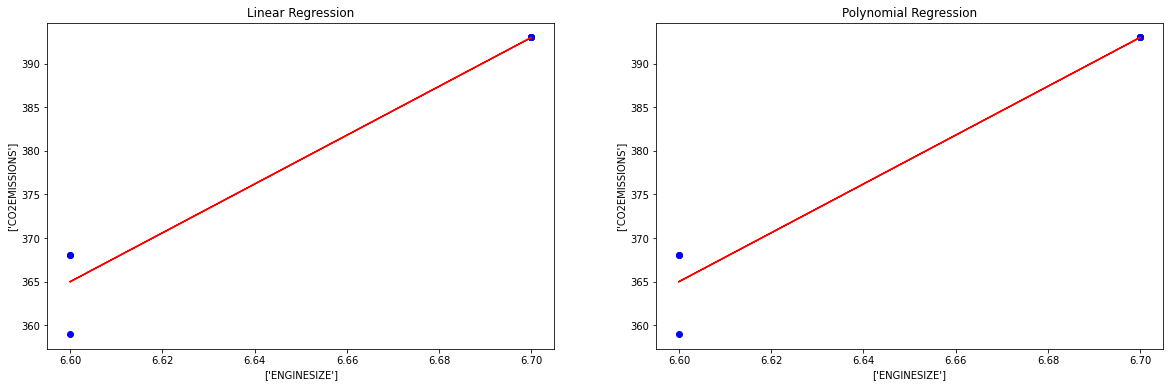

Car Make: FIAT


Car Make: SUBARU


Car Make: DODGE


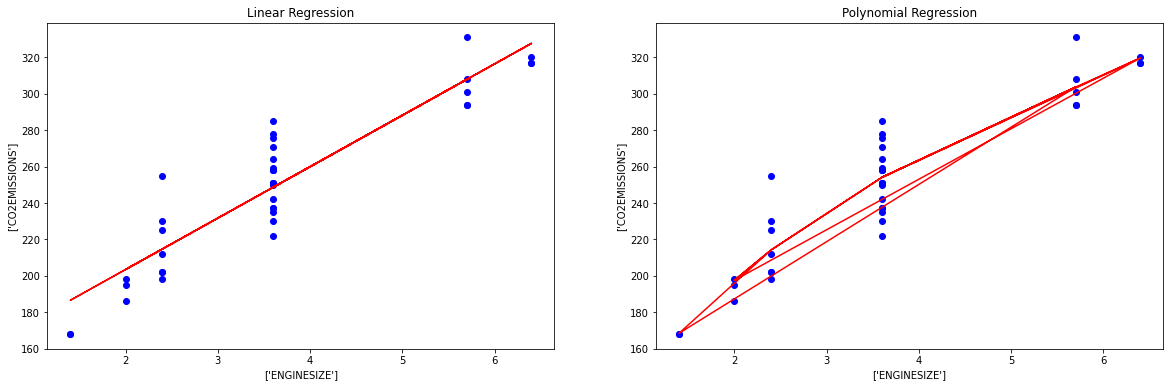

Car Make: AUDI


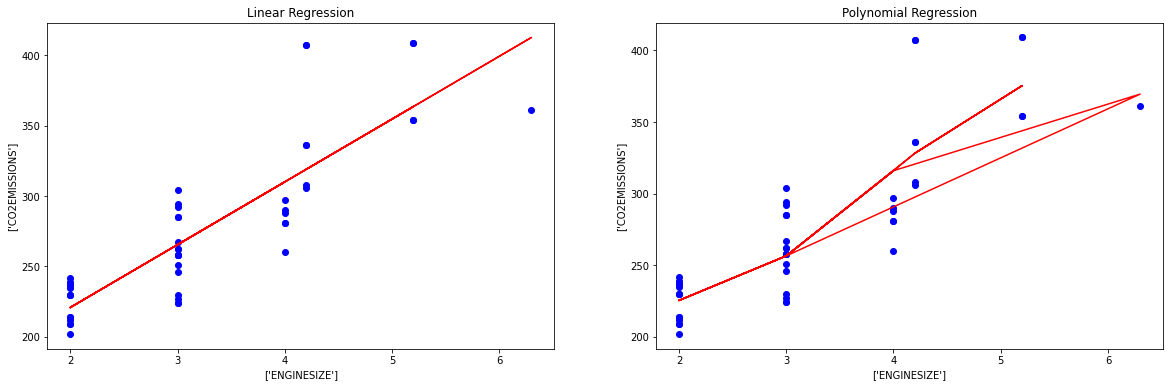

Car Make: MASERATI


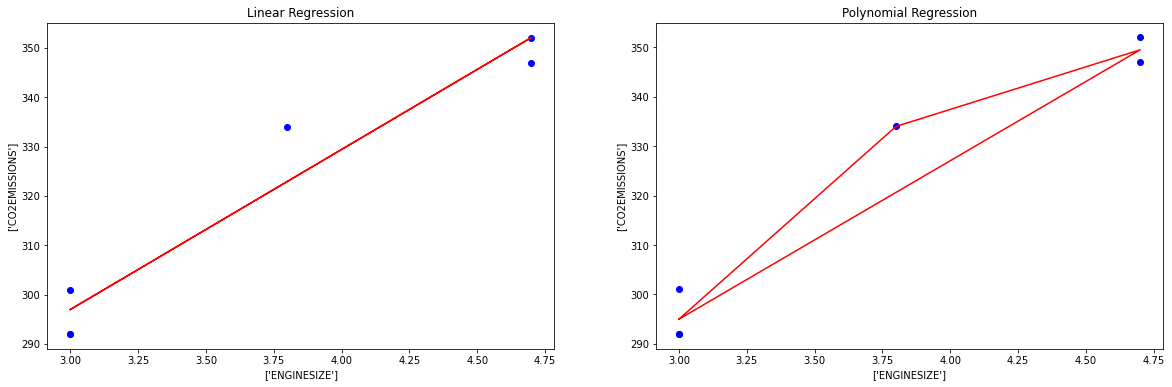

Car Make: MERCEDES-BENZ


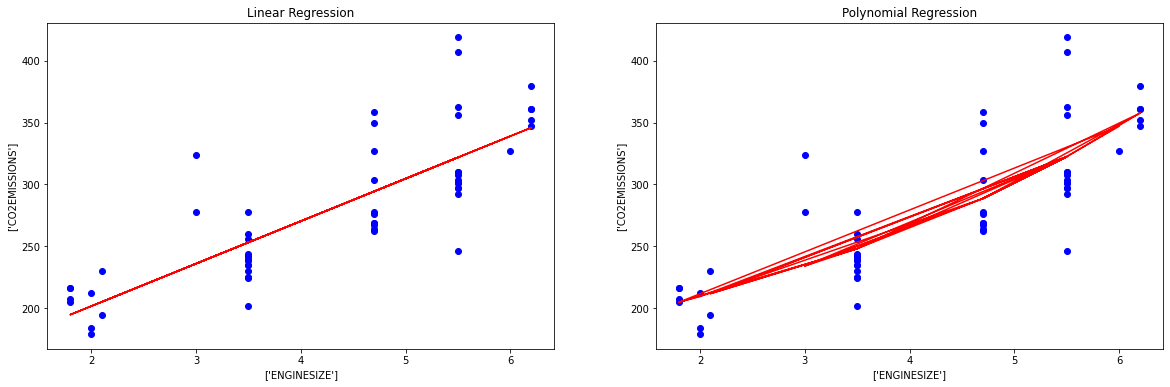

Car Make: VOLKSWAGEN


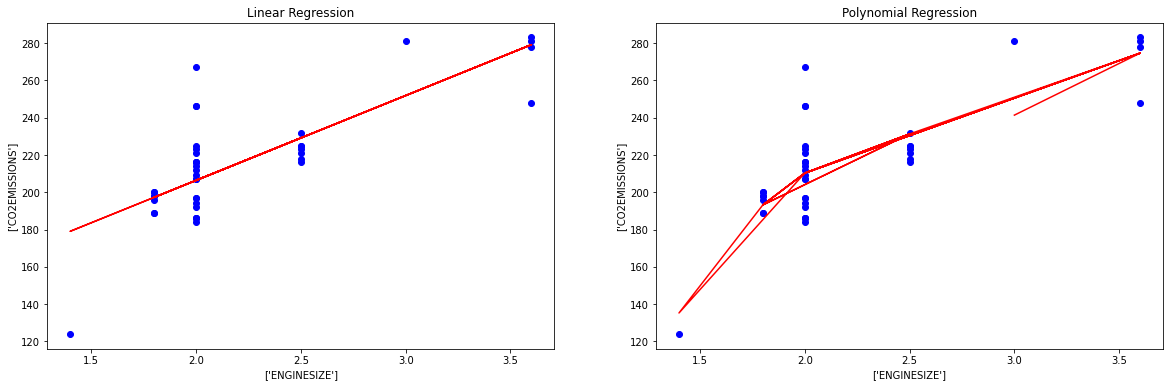

Car Make: MINI


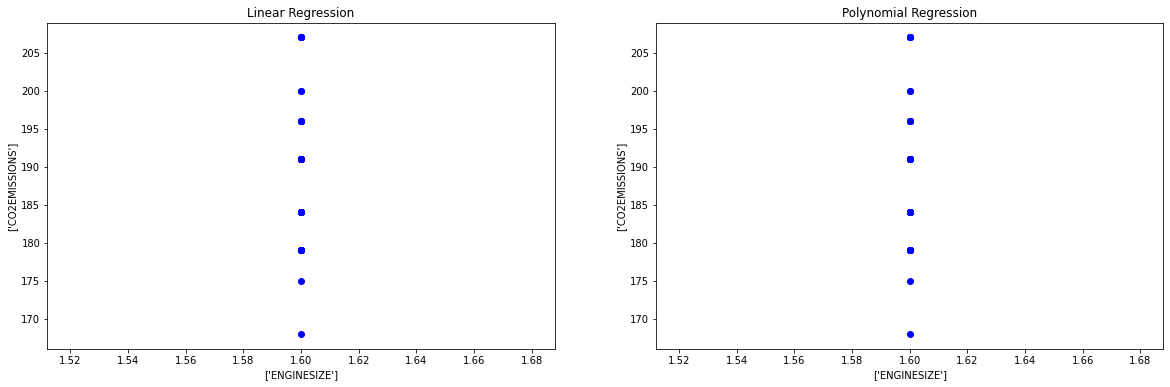

In [43]:
# Split by car make
for make in set([x for x in df['MAKE']]):
    print('Car Make: {}'.format(make))
    df_new = df[(df['MAKE'] == make)].reset_index()
    # Set x & y values
    x, x_label = df_new[['ENGINESIZE']].values, list(df_new[['ENGINESIZE']].columns)
    y, y_label = df_new['CO2EMISSIONS'].values, list(df_new[['CO2EMISSIONS']].columns)

    polynomial_regression_model(x, y, x_label, y_label, 3)